In [1]:
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/nakyung/projects/BDAIFin/notebooks'

In [3]:
import os
os.chdir("..")

In [4]:
import pandas as pd
test = pd.read_parquet("data/online/test_raw.parquet")
train = pd.read_parquet("data/online/train_oss.parquet")

In [5]:
print(test.shape)
print(test.info())
test

(178154, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178154 entries, 0 to 178153
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   client_id                        178154 non-null  int64  
 1   card_id                          178154 non-null  int64  
 2   amount                           178154 non-null  float32
 3   merchant_id                      178154 non-null  int64  
 4   current_age                      178154 non-null  int64  
 5   retirement_age                   178154 non-null  int64  
 6   birth_year                       178154 non-null  int64  
 7   birth_month                      178154 non-null  int8   
 8   latitude                         178154 non-null  float64
 9   longitude                        178154 non-null  float64
 10  per_capita_income                178154 non-null  float32
 11  yearly_income                    178154 non-null  fl

,client_id,card_id,amount,merchant_id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,...,mccg_Entertainment,mccg_Automotive_Home,mccg_Utilities_Government,mccg_Professional_Services,mccg_Industrial_/_Manufacturing,cb_Visa,cb_Mastercard,cb_Amex,cb_Discover,distance_imputed
0,1909,4017,27.889999,15143,56,66,1963,5,34.02,-118.28,...,0,0,0,0,0,1,0,0,0,0
1,1844,4421,167.410004,79050,79,72,1941,2,27.80,-97.39,...,0,0,1,0,0,0,0,0,1,0
2,53,3581,12.900000,15143,49,68,1970,12,38.62,-120.62,...,0,0,0,0,0,0,1,0,0,0
3,758,2181,23.719999,15143,63,68,1956,12,34.09,-118.13,...,0,0,0,0,0,0,1,0,0,0
4,452,4451,31.629999,41122,31,74,1988,3,29.76,-95.38,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178149,1910,3288,30.150000,39021,49,59,1970,5,27.48,-82.57,...,0,0,0,0,0,0,1,0,0,0
178150,1039,304,135.009995,726,68,64,1951,3,34.04,-118.21,...,0,0,1,0,0,1,0,0,0,0
178151,1992,1132,46.840000,88459,63,72,1956,7,36.61,-89.81,...,0,0,0,0,0,1,0,0,0,0
178152,1910,5505,32.090000,39021,49,59,1970,5,27.48,-82.57,...,0,0,0,0,0,1,0,0,0,0


In [6]:
print(train.shape)
print(train.info())
train

(708101, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708101 entries, 0 to 708100
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   client_id                        708101 non-null  int64  
 1   card_id                          708101 non-null  int64  
 2   amount                           708101 non-null  float32
 3   merchant_id                      708101 non-null  int64  
 4   current_age                      708101 non-null  int64  
 5   retirement_age                   708101 non-null  int64  
 6   birth_year                       708101 non-null  int64  
 7   birth_month                      708101 non-null  int8   
 8   latitude                         708101 non-null  float64
 9   longitude                        708101 non-null  float64
 10  per_capita_income                708101 non-null  float32
 11  yearly_income                    708101 non-null  fl

,client_id,card_id,amount,merchant_id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,...,mccg_Automotive_Home,mccg_Utilities_Government,mccg_Professional_Services,mccg_Industrial_/_Manufacturing,cb_Visa,cb_Mastercard,cb_Amex,cb_Discover,distance_imputed,fraud
0,335,5131,87.830002,60569,46,68,1973,7,26.74,-80.12,...,0,0,0,0,1,0,0,0,0,1
1,379,2019,23.100000,81477,47,65,1972,11,30.68,-88.04,...,0,0,0,0,0,1,0,0,0,1
2,1048,2542,95.919998,41184,59,63,1960,12,29.79,-95.82,...,0,0,0,0,0,1,0,0,0,1
3,1019,5112,421.559998,60569,81,57,1939,1,34.09,-117.96,...,0,0,0,0,0,1,0,0,0,1
4,720,4136,38.369999,33526,36,65,1983,5,42.38,-83.10,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708096,877,3877,7.700000,47399,36,63,1983,8,33.44,-111.85,...,0,0,0,0,0,0,1,0,0,0
708097,1341,4766,28.049999,39021,87,72,1932,8,41.15,-85.48,...,0,0,0,0,0,1,0,0,0,0
708098,987,2748,25.250000,39021,52,67,1967,10,39.14,-77.21,...,0,0,0,0,0,1,0,0,0,0
708099,585,5881,21.410000,18563,52,62,1967,9,30.11,-97.30,...,0,0,0,0,0,1,0,0,0,0


In [7]:
df = pd.concat([train, test], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886255 entries, 0 to 178153
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   client_id                        886255 non-null  int64  
 1   card_id                          886255 non-null  int64  
 2   amount                           886255 non-null  float32
 3   merchant_id                      886255 non-null  int64  
 4   current_age                      886255 non-null  int64  
 5   retirement_age                   886255 non-null  int64  
 6   birth_year                       886255 non-null  int64  
 7   birth_month                      886255 non-null  int8   
 8   latitude                         886255 non-null  float64
 9   longitude                        886255 non-null  float64
 10  per_capita_income                886255 non-null  float32
 11  yearly_income                    886255 non-null  float32
 12  total_d

In [8]:
df.shape

(886255, 58)

In [9]:
df["yearly_income"] # 연간 소득

0         56467.0
1         43496.0
2         53878.0
3         29928.0
4         19800.0
           ...   
178149    35868.0
178150    11566.0
178151    23725.0
178152    35868.0
178153    29594.0
Name: yearly_income, Length: 886255, dtype: float32

In [10]:
df["per_capita_income"] # 평균 소득 수준 _ 지역/집단

0         27696.0
1         21331.0
2         26422.0
3         15775.0
4          9710.0
           ...   
178149    17590.0
178150    12349.0
178151    11636.0
178152    17590.0
178153    14514.0
Name: per_capita_income, Length: 886255, dtype: float32

# amount

In [11]:
df["amount"].describe()

count    886255.000000
mean         57.035179
std          92.039726
min        -500.000000
25%          21.809999
50%          35.049999
75%          57.090000
max        5696.779785
Name: amount, dtype: float64

In [12]:
df["amount"]

0          87.830002
1          23.100000
2          95.919998
3         421.559998
4          38.369999
             ...    
178149     30.150000
178150    135.009995
178151     46.840000
178152     32.090000
178153     42.380001
Name: amount, Length: 886255, dtype: float32

In [13]:
err = df[df["amount"] < 0]
err.shape

(4112, 58)

In [14]:
# refund 중 fraud 비율
refund = df[df["amount"]<0]
refund["fraud"].value_counts()

fraud
0    3711
1     401
Name: count, dtype: int64

In [15]:
df = df[df["amount"]>=0]

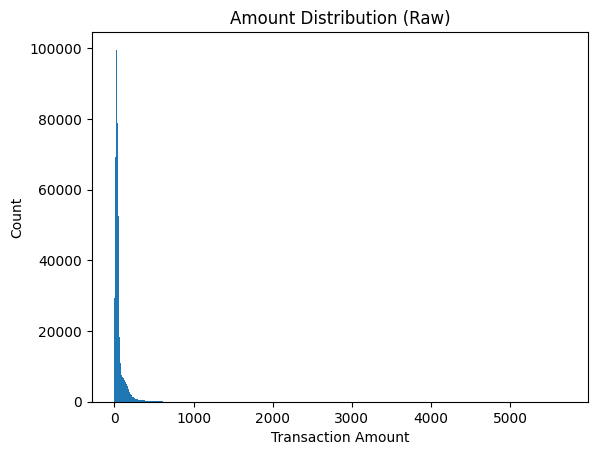

In [16]:
plt.figure()
plt.hist(df["amount"], bins=1000)
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.title("Amount Distribution (Raw)")
plt.show()

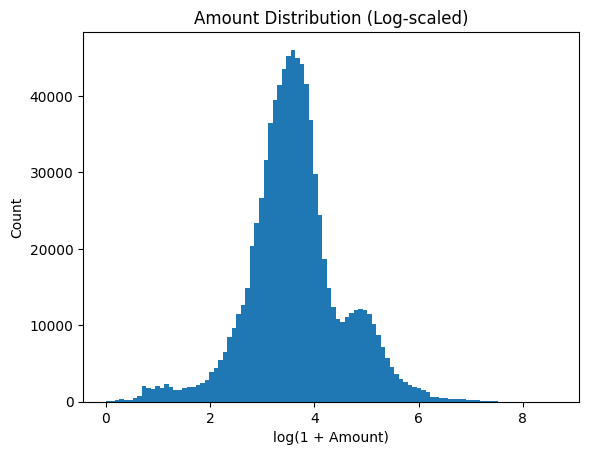

In [17]:
import numpy as np

plt.figure()
plt.hist(np.log1p(df["amount"]), bins=100)
plt.xlabel("log(1 + Amount)")
plt.ylabel("Count")
plt.title("Amount Distribution (Log-scaled)")
plt.show()


In [18]:
df["log_amount"] = np.log1p(df["amount"])

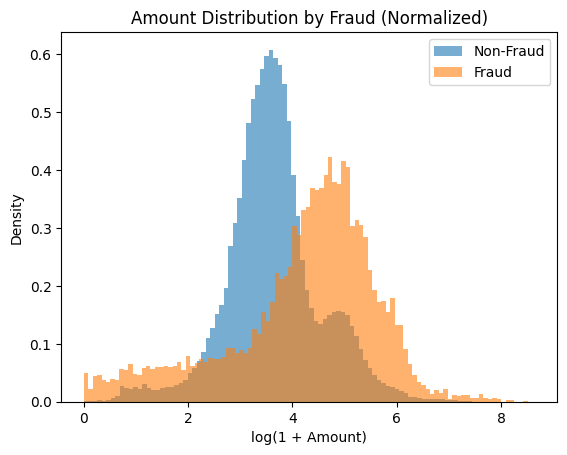

In [19]:
plt.figure()

plt.hist(np.log1p(df[df["fraud"]==0]["amount"]),
         bins=100, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df[df["fraud"]==1]["amount"]),
         bins=100, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("log(1 + Amount)")
plt.ylabel("Density")
plt.title("Amount Distribution by Fraud (Normalized)")
plt.show()


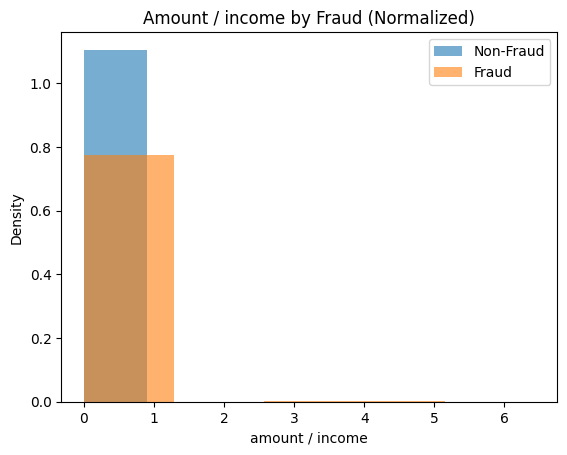

In [20]:
# amount / income
df2 = df.copy()
df2["am/in"] = df["amount"]/df["yearly_income"]

plt.figure()

plt.hist(np.log1p(df2[df2["fraud"]==0]["am/in"]),
         bins=5, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df2[df2["fraud"]==1]["am/in"]),
         bins=5, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("amount / income")
plt.ylabel("Density")
plt.title("Amount / income by Fraud (Normalized)")
plt.show()

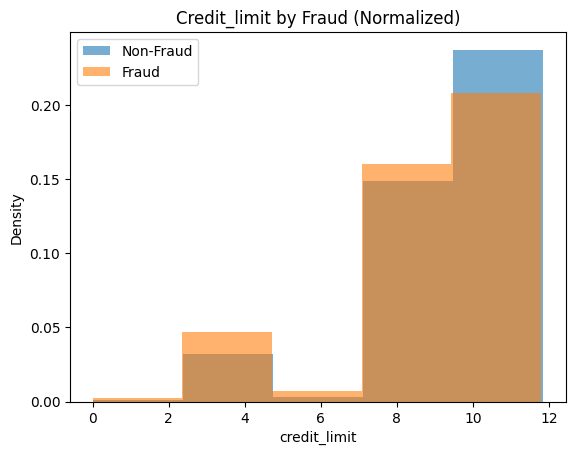

In [21]:
# amount / credit_limit
df2 = df.copy()
df2["am/in"] = df["amount"]/df["credit_limit"]

plt.figure()

plt.hist(np.log1p(df2[df2["fraud"]==0]["credit_limit"]),
         bins=5, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df2[df2["fraud"]==1]["credit_limit"]),
         bins=5, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("credit_limit")
plt.ylabel("Density")
plt.title("Credit_limit by Fraud (Normalized)")
plt.show()

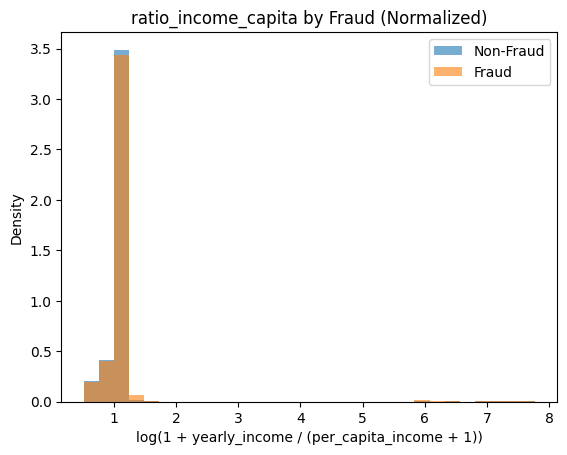

In [37]:
df2 = df.copy()

df2["ratio_income_capita"] = df2["yearly_income"] / (df2["per_capita_income"] + 1)

x0 = np.log1p(df2.loc[df2["fraud"] == 0, "ratio_income_capita"])
x1 = np.log1p(df2.loc[df2["fraud"] == 1, "ratio_income_capita"])

x0 = x0.replace([np.inf, -np.inf], np.nan).dropna()
x1 = x1.replace([np.inf, -np.inf], np.nan).dropna()

plt.figure()
plt.hist(x0, bins=30, density=True, alpha=0.6, label="Non-Fraud")
plt.hist(x1, bins=30, density=True, alpha=0.6, label="Fraud")
plt.legend()
plt.xlabel("log(1 + yearly_income / (per_capita_income + 1))")
plt.ylabel("Density")
plt.title("ratio_income_capita by Fraud (Normalized)")
plt.show()


### 분포 차이 검정

KS test

In [83]:
from scipy.stats import ks_2samp

x_nf = df.loc[df["fraud"]==0, "log_amount"]
x_f  = df.loc[df["fraud"]==1, "log_amount"]

ks_stat, p_value = ks_2samp(x_nf, x_f)

print("KS statistic:", ks_stat)
print("p-value:", p_value)

KS statistic: 0.4004465279860918
p-value: 0.0


Cohen's d

In [84]:
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(
        ((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / (nx+ny-2)
    )
    return (x.mean() - y.mean()) / pooled_std

d = cohens_d(x_f, x_nf)
print("Cohen's d:", d)

Cohen's d: 0.624329


logistic regreesion

In [85]:
import statsmodels.api as sm

X = df[["log_amount"]]
X = sm.add_constant(X)
y = df["fraud"]

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.051488
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               882143
Model:                          Logit   Df Residuals:                   882141
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Feb 2026   Pseudo R-squ.:                 0.03274
Time:                        17:39:39   Log-Likelihood:                -45420.
converged:                       True   LL-Null:                       -46957.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1465      0.048   -149.293      0.000      -7.240      -7.053
log_amount     0.6376      0.

In [86]:
print("Odds Ratio:", np.exp(model.params))

Odds Ratio: const         0.000788
log_amount    1.891873
dtype: float64


bin 기반 Fraud Rate + Lift

In [ ]:
df["amount_bin"] = pd.qcut(df["log_amount"], 10)

fraud_rate = df.groupby("amount_bin")["fraud"].mean()
overall_rate = df["fraud"].mean()

lift = fraud_rate / overall_rate

print(lift)

amount_bin
(-0.001, 2.638]    1.494514
(2.638, 3.015]     0.324507
(3.015, 3.237]     0.196309
(3.237, 3.421]     0.225571
(3.421, 3.589]     0.255873
(3.589, 3.758]     0.340051
(3.758, 3.943]     0.406235
(3.943, 4.244]     0.874472
(4.244, 4.887]     2.409296
(4.887, 8.648]     3.472938
Name: fraud, dtype: float64


/tmp/ipykernel_3449023/1940612331.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby("amount_bin")["fraud"].mean()


Mann-Whitney U test

In [88]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(x_nf, x_f, alternative='two-sided')
print("U test p-value:", p)

U test p-value: 0.0


In [98]:
evaluate_numeric_feature(df, "amount")

KS_p          0.000000
MW_p          0.000000
Cohen_d       0.947657
Odds_Ratio    1.002785
Logit_p       0.000000
PR_AUC        0.030674
dtype: float64

# current age

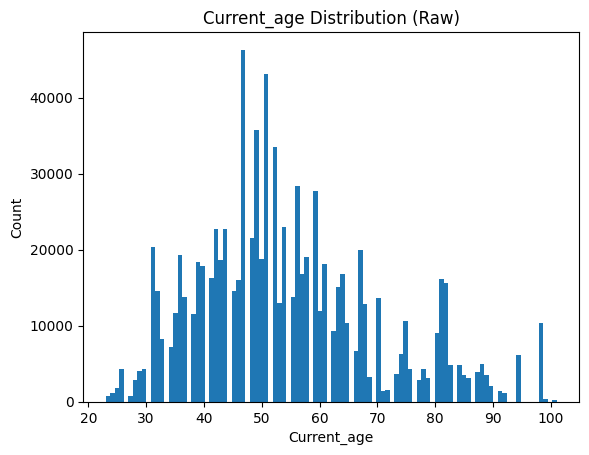

In [ ]:
plt.figure()
plt.hist(df["current_age"], bins=100)
plt.xlabel("Current_age")
plt.ylabel("Count")
plt.title("Current_age Distribution (Raw)")
plt.show()

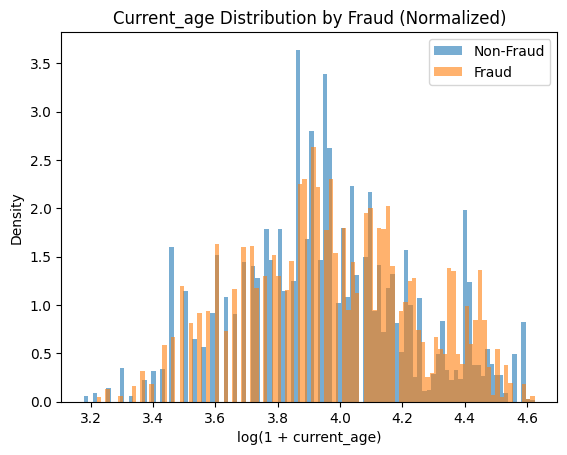

In [23]:
plt.figure()

plt.hist(np.log1p(df[df["fraud"]==0]["current_age"]),
         bins=100, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df[df["fraud"]==1]["current_age"]),
         bins=100, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("log(1 + current_age)")
plt.ylabel("Density")
plt.title("Current_age Distribution by Fraud (Normalized)")
plt.show()


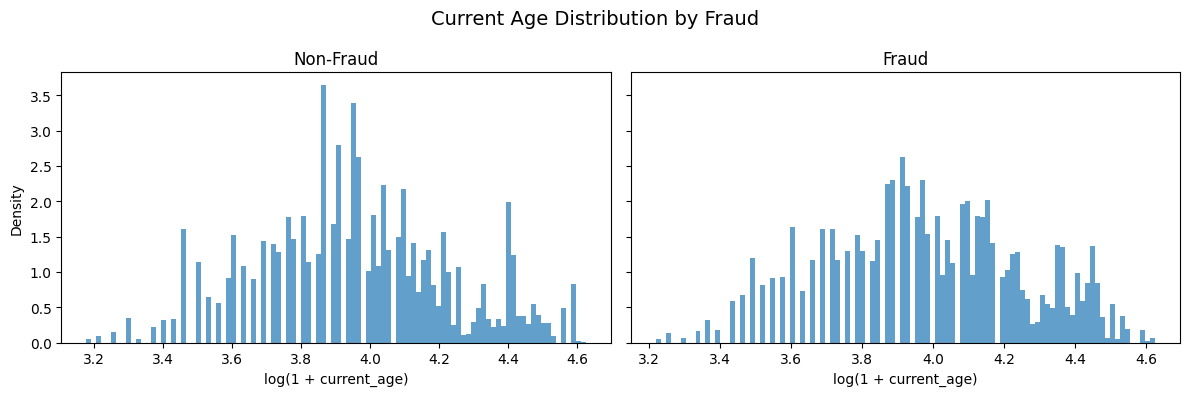

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Non-Fraud
ax1.hist(
    np.log1p(df.loc[df["fraud"] == 0, "current_age"]),
    bins=100, density=True, alpha=0.7
)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("log(1 + current_age)")
ax1.set_ylabel("Density")

# Fraud
ax2.hist(
    np.log1p(df.loc[df["fraud"] == 1, "current_age"]),
    bins=100, density=True, alpha=0.7
)
ax2.set_title("Fraud")
ax2.set_xlabel("log(1 + current_age)")

plt.suptitle("Current Age Distribution by Fraud", fontsize=14)
plt.tight_layout()
plt.show()


KS Test

In [90]:
from scipy.stats import ks_2samp

x_nf = df.loc[df["fraud"] == 0, "current_age"]
x_f  = df.loc[df["fraud"] == 1, "current_age"]

ks_stat, p_value = ks_2samp(x_nf, x_f)

print("KS statistic:", ks_stat)
print("p-value:", p_value)

KS statistic: 0.06806913050858088
p-value: 1.5366835745653757e-33


Cohen’s d

In [91]:
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(
        ((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / (nx+ny-2)
    )
    return (x.mean() - y.mean()) / pooled_std

d = cohens_d(x_f, x_nf)
print("Cohen's d:", d)

Cohen's d: 0.08443627530689171


단변량 로지스틱 회귀

In [92]:
X = df[["current_age"]]
X = sm.add_constant(X)
y = df["fraud"]

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.053198
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               882143
Model:                          Logit   Df Residuals:                   882141
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Feb 2026   Pseudo R-squ.:               0.0006127
Time:                        17:51:05   Log-Likelihood:                -46928.
converged:                       True   LL-Null:                       -46957.
Covariance Type:            nonrobust   LLR p-value:                 3.310e-14
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.9480      0.040   -123.778      0.000      -5.026      -4.870
current_age     0.0053    

In [93]:
print("Odds Ratio:", np.exp(model.params))

Odds Ratio: const          0.007098
current_age    1.005297
dtype: float64


PR-AUC (단독 예측력)

In [94]:
from sklearn.metrics import average_precision_score

score = average_precision_score(df["fraud"], df["current_age"])
print("PR-AUC (age only):", score)

PR-AUC (age only): 0.010121003605520559


Bin 기반 Fraud Rate

/tmp/ipykernel_3449023/2671232821.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby("age_bin")["fraud"].mean()


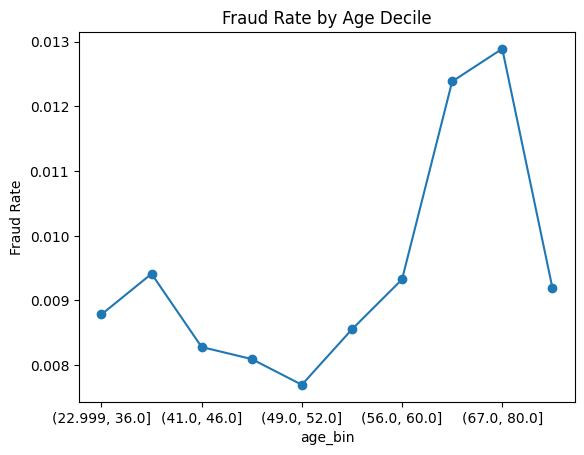

In [95]:
df["age_bin"] = pd.qcut(df["current_age"], 10)

fraud_rate = df.groupby("age_bin")["fraud"].mean()
fraud_rate.plot(marker="o")
plt.title("Fraud Rate by Age Decile")
plt.ylabel("Fraud Rate")
plt.show()

In [99]:
evaluate_numeric_feature(df, "current_age")

KS_p          1.536684e-33
MW_p          4.359489e-19
Cohen_d       8.443628e-02
Odds_Ratio    1.005297e+00
Logit_p       2.013742e-14
PR_AUC        1.012100e-02
dtype: float64

# retirement age

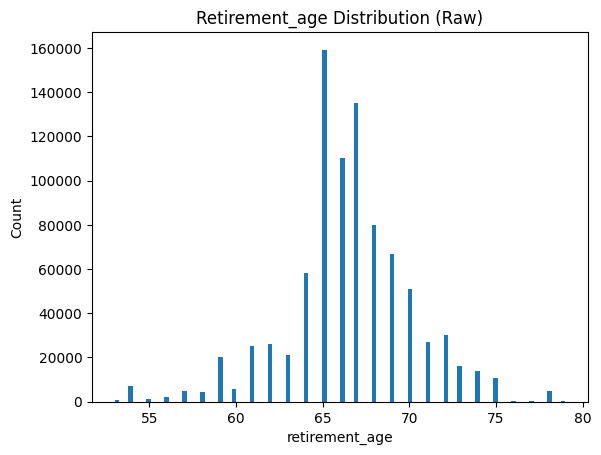

In [25]:
plt.figure()
plt.hist(df["retirement_age"], bins=100)
plt.xlabel("retirement_age")
plt.ylabel("Count")
plt.title("Retirement_age Distribution (Raw)")
plt.show()

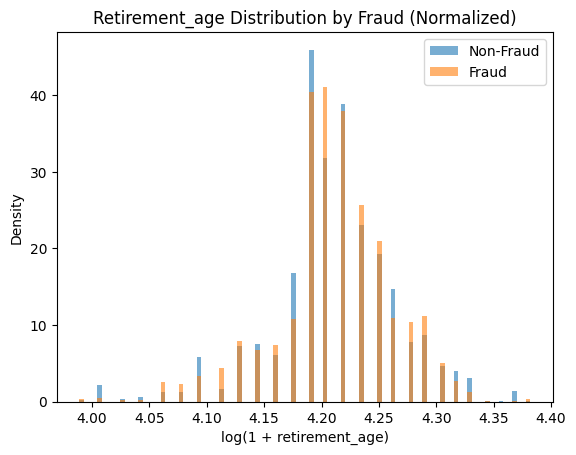

In [26]:
plt.figure()

plt.hist(np.log1p(df[df["fraud"]==0]["retirement_age"]),
         bins=100, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df[df["fraud"]==1]["retirement_age"]),
         bins=100, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("log(1 + retirement_age)")
plt.ylabel("Density")
plt.title("Retirement_age Distribution by Fraud (Normalized)")
plt.show()

KS test (분포 차이)

In [96]:
def evaluate_numeric_feature(df, feature):

    x_nf = df.loc[df["fraud"] == 0, feature]
    x_f  = df.loc[df["fraud"] == 1, feature]

    # 1️⃣ KS test
    ks_stat, ks_p = ks_2samp(x_nf, x_f)

    # 2️⃣ Mann-Whitney
    mw_stat, mw_p = mannwhitneyu(x_nf, x_f, alternative="two-sided")

    # 3️⃣ Cohen's d
    def cohens_d(x, y):
        nx, ny = len(x), len(y)
        pooled_std = np.sqrt(
            ((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / (nx+ny-2)
        )
        return (x.mean() - y.mean()) / pooled_std

    d = cohens_d(x_f, x_nf)

    # 4️⃣ Logistic Regression
    X = sm.add_constant(df[[feature]])
    y = df["fraud"]
    model = sm.Logit(y, X).fit(disp=0)
    odds_ratio = np.exp(model.params[feature])
    p_logit = model.pvalues[feature]

    # 5️⃣ PR-AUC
    pr_auc = average_precision_score(df["fraud"], df[feature])

    result = {
        "KS_p": ks_p,
        "MW_p": mw_p,
        "Cohen_d": d,
        "Odds_Ratio": odds_ratio,
        "Logit_p": p_logit,
        "PR_AUC": pr_auc
    }

    return pd.Series(result)

evaluate_numeric_feature(df, "retirement_age")


KS_p          1.323226e-11
MW_p          2.138412e-02
Cohen_d       4.211464e-03
Odds_Ratio    1.001155e+00
Logit_p       7.026728e-01
PR_AUC        9.386338e-03
dtype: float64

# latitude & longitude 

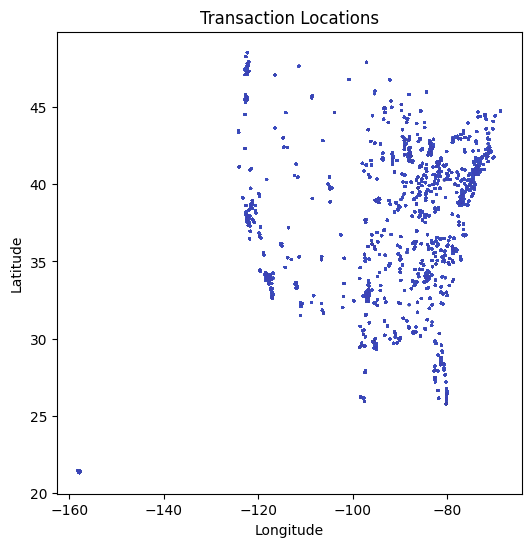

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(df["longitude"], df["latitude"],
            s=1, alpha=0.1,
            c=df["fraud"], cmap="coolwarm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Transaction Locations")
plt.show()

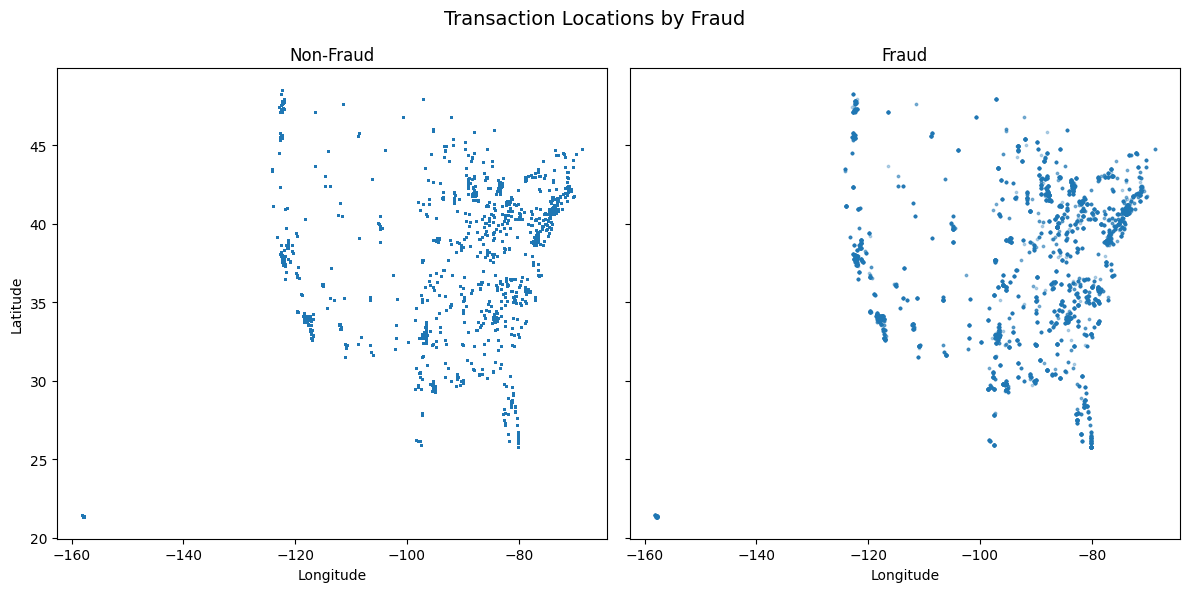

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Non-Fraud
df_nf = df[df["fraud"] == 0]
ax1.scatter(df_nf["longitude"], df_nf["latitude"],
            s=1, alpha=0.1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")

# Fraud
df_f = df[df["fraud"] == 1]
ax2.scatter(df_f["longitude"], df_f["latitude"],
            s=3, alpha=0.3)  
ax2.set_title("Fraud")
ax2.set_xlabel("Longitude")

plt.suptitle("Transaction Locations by Fraud", fontsize=14)
plt.tight_layout()
plt.show()


In [97]:
evaluate_numeric_feature(df, "latitude")

KS_p          5.205314e-12
MW_p          7.243854e-07
Cohen_d       4.674813e-02
Odds_Ratio    1.009184e+00
Logit_p       2.269525e-05
PR_AUC        9.974020e-03
dtype: float64

In [100]:
evaluate_numeric_feature(df, "longitude")

KS_p          9.202754e-61
MW_p          2.270087e-35
Cohen_d      -9.806183e-02
Odds_Ratio    9.943185e-01
Logit_p       6.788330e-19
PR_AUC        8.287078e-03
dtype: float64

# total_debt

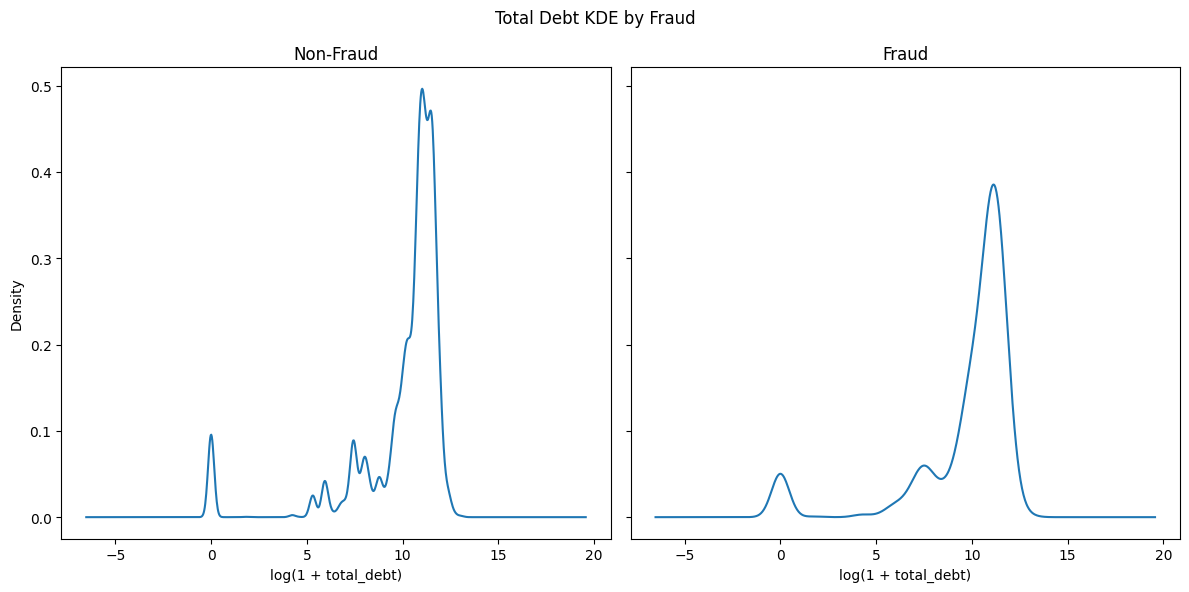

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["total_debt"].pipe(np.log1p).plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("log(1 + total_debt)")

df_f["total_debt"].pipe(np.log1p).plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("log(1 + total_debt)")

plt.suptitle("Total Debt KDE by Fraud")
plt.tight_layout()
plt.show()

In [103]:
evaluate_numeric_feature(df, "total_debt")

KS_p          1.019130e-27
MW_p          1.766646e-26
Cohen_d      -1.095388e-01
Odds_Ratio    9.999976e-01
Logit_p       2.822884e-23
PR_AUC        8.502976e-03
dtype: float64

# credit_score

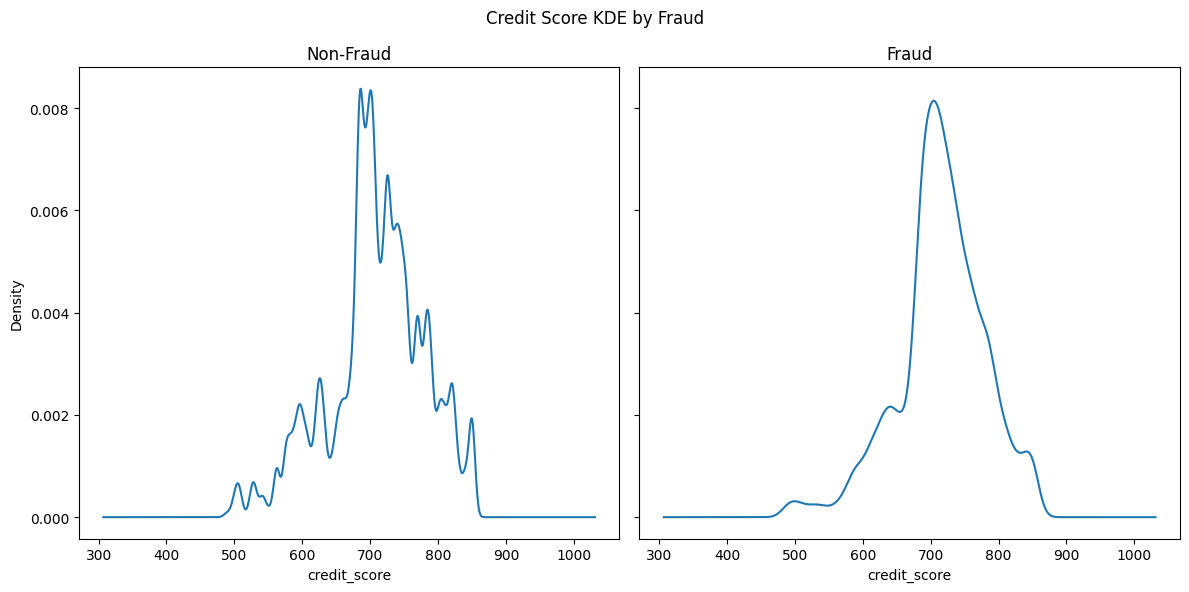

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["credit_score"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("credit_score")

df_f["credit_score"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("credit_score")

plt.suptitle("Credit Score KDE by Fraud")
plt.tight_layout()
plt.show()

In [104]:
evaluate_numeric_feature(df, "credit_score")

KS_p          8.809143e-31
MW_p          1.118353e-13
Cohen_d       8.562249e-02
Odds_Ratio    1.001226e+00
Logit_p       8.522011e-15
PR_AUC        9.626452e-03
dtype: float64

# num_credit_cards

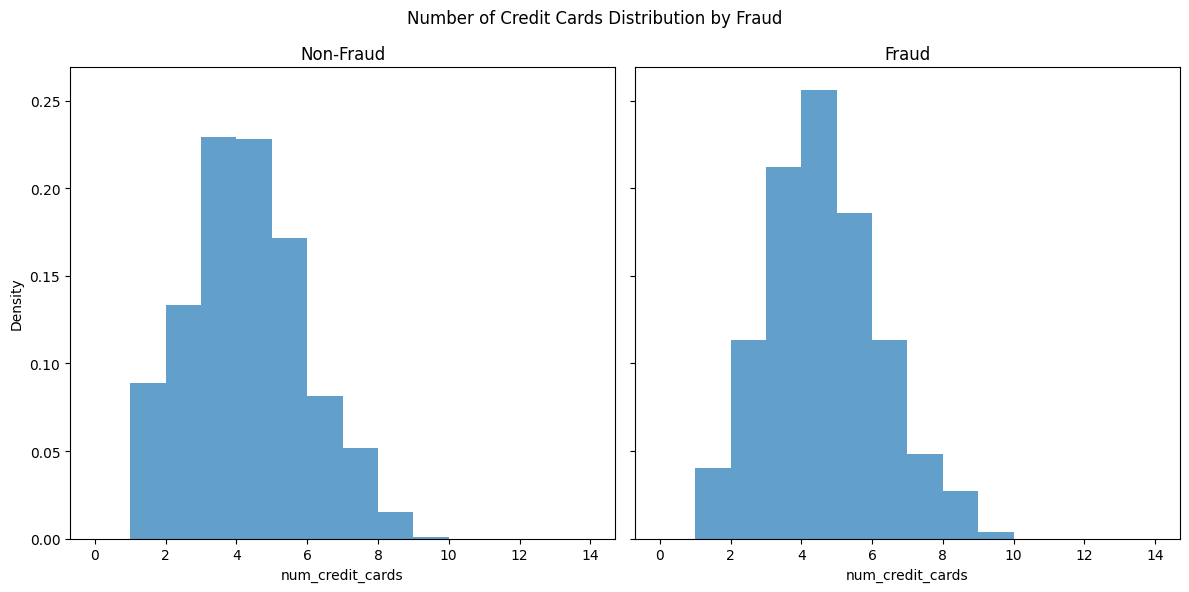

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.hist(df_nf["num_credit_cards"], bins=range(0, 15),
         density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("num_credit_cards")
ax1.set_ylabel("Density")

ax2.hist(df_f["num_credit_cards"], bins=range(0, 15),
         density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("num_credit_cards")

plt.suptitle("Number of Credit Cards Distribution by Fraud")
plt.tight_layout()
plt.show()


In [105]:
evaluate_numeric_feature(df, "num_credit_cards")

KS_p          1.571524e-53
MW_p          1.167074e-71
Cohen_d       2.026141e-01
Odds_Ratio    1.126711e+00
Logit_p       4.806760e-75
PR_AUC        1.106458e-02
dtype: float64

# num_cards_issued

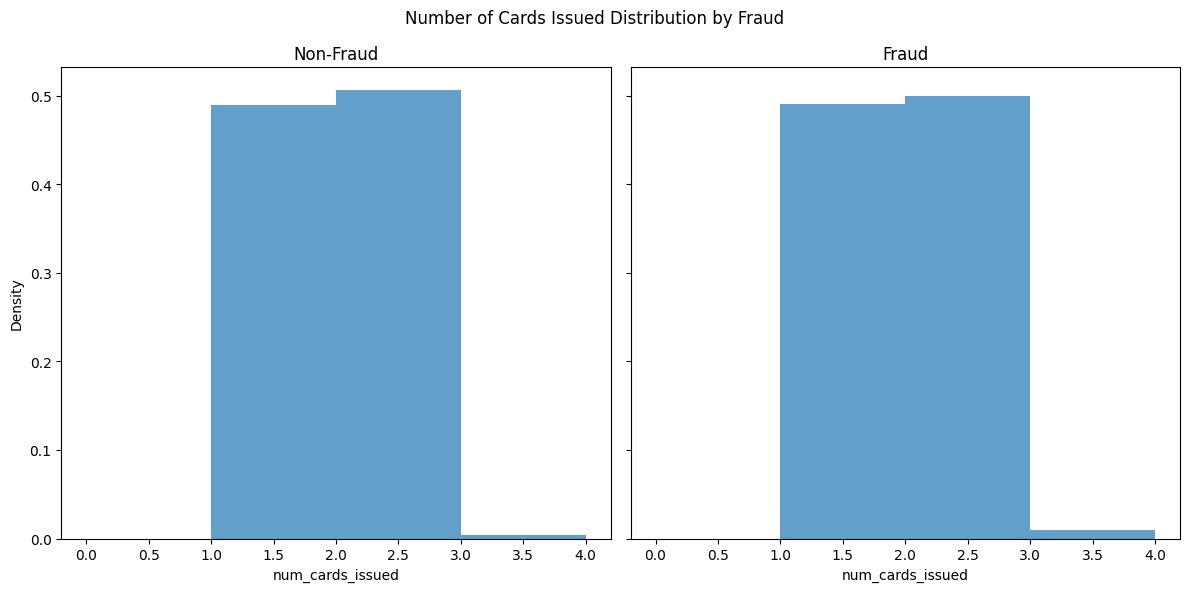

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Non-Fraud
ax1.hist(df_nf["num_cards_issued"],
         bins=range(0, df["num_cards_issued"].max() + 2),
         density=True,
         alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("num_cards_issued")
ax1.set_ylabel("Density")

# Fraud
ax2.hist(df_f["num_cards_issued"],
         bins=range(0, df["num_cards_issued"].max() + 2),
         density=True,
         alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("num_cards_issued")

plt.suptitle("Number of Cards Issued Distribution by Fraud")
plt.tight_layout()
plt.show()

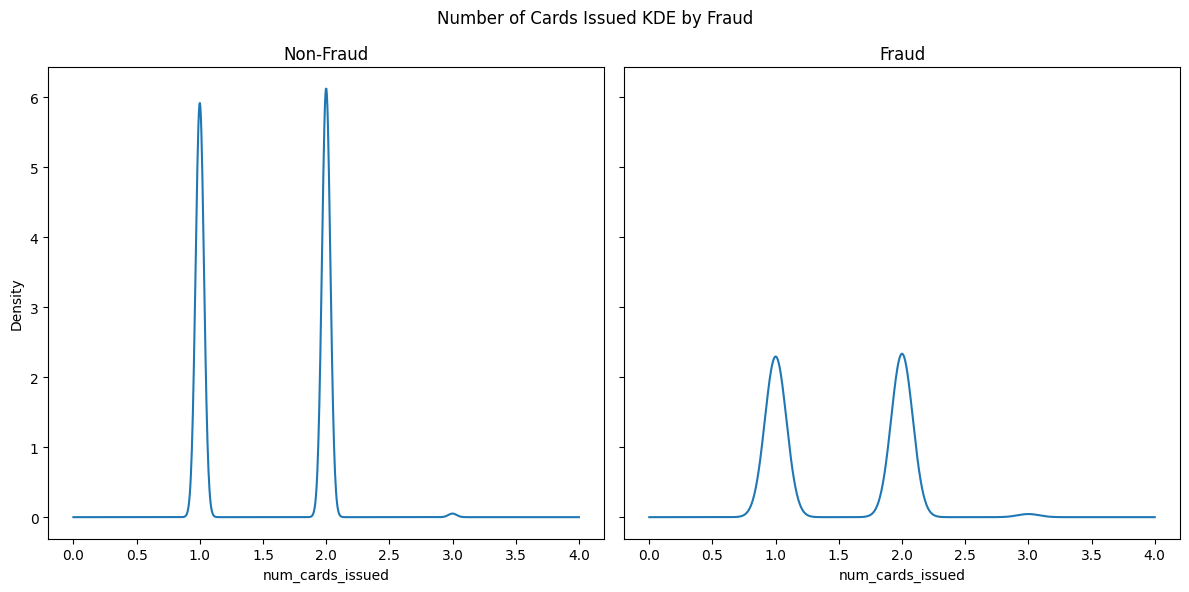

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["num_cards_issued"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("num_cards_issued")

df_f["num_cards_issued"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("num_cards_issued")

plt.suptitle("Number of Cards Issued KDE by Fraud")
plt.tight_layout()
plt.show()


In [106]:
evaluate_numeric_feature(df, "num_cards_issued")

KS_p          0.974525
MW_p          0.882769
Cohen_d       0.006682
Odds_Ratio    1.013231
Logit_p       0.544787
PR_AUC        0.009493
dtype: float64

# credit_limit

In [44]:
df["credit_limit"]

0         23401.0
1         21628.0
2         22527.0
3          7300.0
4           974.0
           ...   
178149    10764.0
178150     4900.0
178151    10374.0
178152     5933.0
178153     7500.0
Name: credit_limit, Length: 882143, dtype: float32

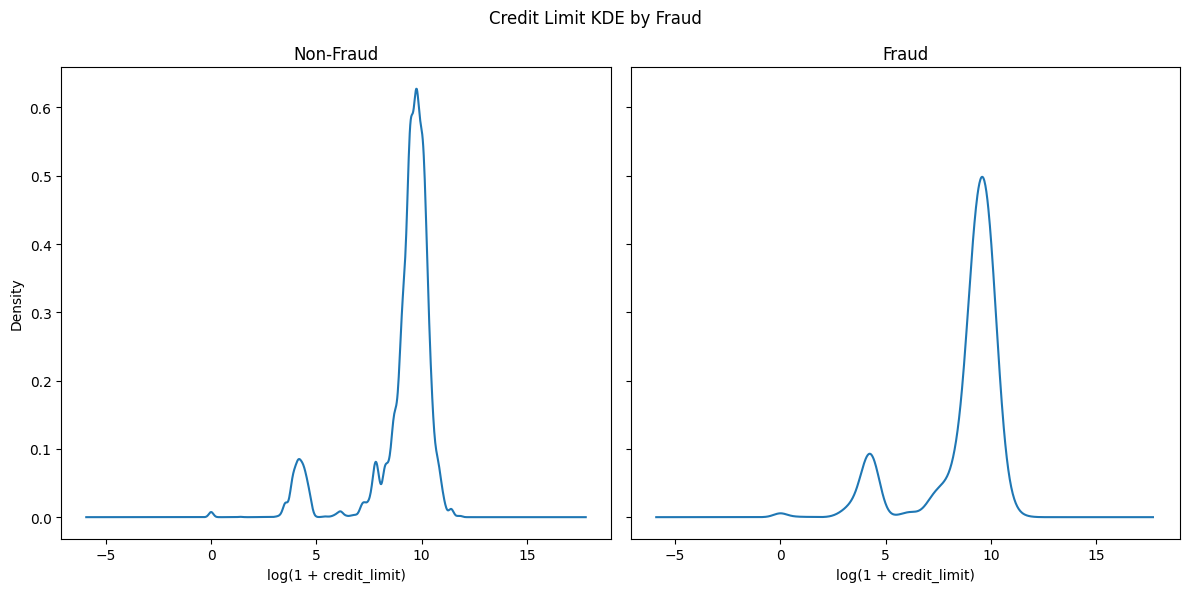

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["credit_limit"].pipe(np.log1p).plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("log(1 + credit_limit)")

df_f["credit_limit"].pipe(np.log1p).plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("log(1 + credit_limit)")

plt.suptitle("Credit Limit KDE by Fraud")
plt.tight_layout()
plt.show()

In [107]:
evaluate_numeric_feature(df, "credit_limit")

KS_p          1.246784e-105
MW_p          1.856236e-106
Cohen_d       -2.111599e-01
Odds_Ratio     9.999790e-01
Logit_p        9.807336e-84
PR_AUC         7.817496e-03
dtype: float64

# year_pin_last_changed

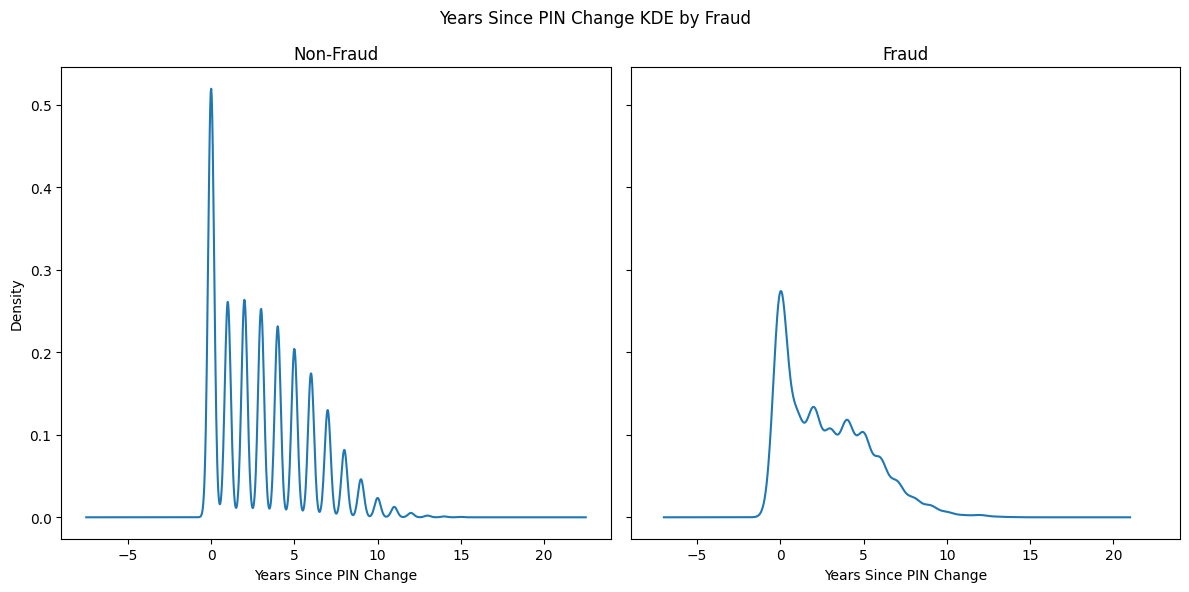

/tmp/ipykernel_3449023/2334653934.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df2.groupby(bins)["fraud"].mean()


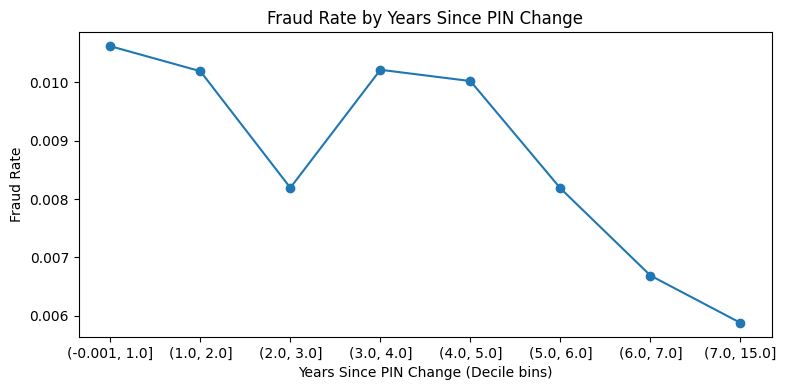

In [ ]:

required = ["tx_year", "year_pin_last_changed", "fraud"]
missing = [c for c in required if c not in df2.columns]
if missing:
    raise KeyError(f"Missing columns: {missing}")

df2["years_since_pin_change"] = df2["tx_year"] - df2["year_pin_last_changed"]

df2["years_since_pin_change"] = (
    df2["years_since_pin_change"]
      .replace([np.inf, -np.inf], np.nan)
)

df2.loc[df2["years_since_pin_change"] < 0, "years_since_pin_change"] = 0

df2 = df2.dropna(subset=["years_since_pin_change", "fraud"])


df_nf = df2[df2["fraud"] == 0]
df_f  = df2[df2["fraud"] == 1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["years_since_pin_change"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Years Since PIN Change")
ax1.set_ylabel("Density")

df_f["years_since_pin_change"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("Years Since PIN Change")

plt.suptitle("Years Since PIN Change KDE by Fraud")
plt.tight_layout()
plt.show()


bins = pd.qcut(df2["years_since_pin_change"], 10, duplicates="drop")
fraud_rate = df2.groupby(bins)["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.xlabel("Years Since PIN Change (Decile bins)")
plt.title("Fraud Rate by Years Since PIN Change")
plt.tight_layout()
plt.show()


In [108]:
evaluate_numeric_feature(df, "year_pin_last_changed")

KS_p          0.001186
MW_p          0.000568
Cohen_d      -0.037823
Odds_Ratio    0.986043
Logit_p       0.000607
PR_AUC        0.009301
dtype: float64

# has_error
- err_bad_card_number
- err_bad_expiration
- err_bad_cvv
- err_bad_pin
- err_bad_zipcode
- err_insufficient_balance
- err_technical_glitch

                          Non-Fraud Rate  Fraud Rate
err_bad_card_number             0.005122    0.006873
err_bad_expiration              0.004005    0.006391
err_bad_cvv                     0.003907    0.015796
err_bad_pin                     0.000000    0.000000
err_bad_zipcode                 0.000000    0.000000
err_insufficient_balance        0.007862    0.014470
err_technical_glitch            0.002053    0.002171


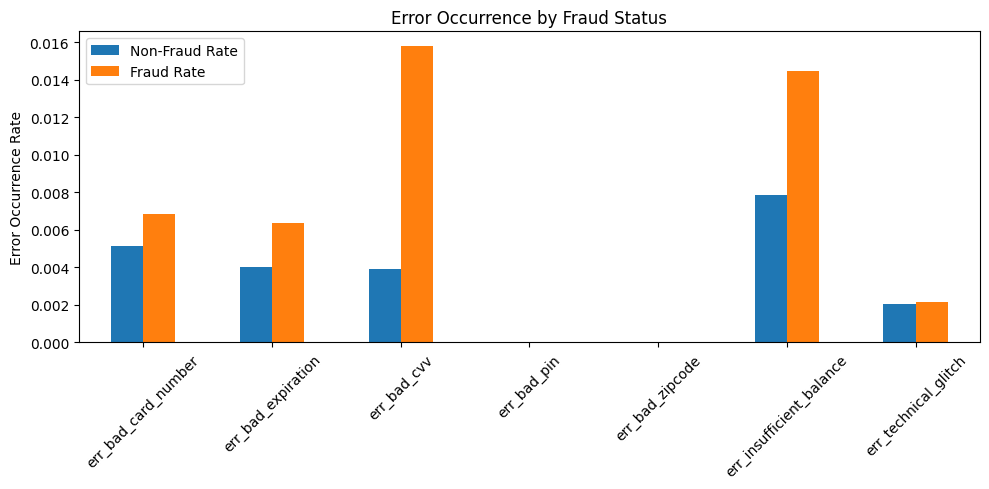

In [49]:
error_cols = [
    "err_bad_card_number",
    "err_bad_expiration",
    "err_bad_cvv",
    "err_bad_pin",
    "err_bad_zipcode",
    "err_insufficient_balance",
    "err_technical_glitch",
]

df2 = df.copy()

# Fraud / Non-Fraud 분리
df_nf = df2[df2["fraud"] == 0]
df_f  = df2[df2["fraud"] == 1]

nf_error_rate = df_nf[error_cols].mean()
f_error_rate  = df_f[error_cols].mean()

error_compare = pd.DataFrame({
    "Non-Fraud Rate": nf_error_rate,
    "Fraud Rate": f_error_rate
})

print(error_compare)

error_compare.plot(kind="bar", figsize=(10,5))
plt.ylabel("Error Occurrence Rate")
plt.title("Error Occurrence by Fraud Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


err_bad_cvv                 0.036953
err_insufficient_balance    0.017167
err_bad_expiration          0.014917
err_bad_card_number         0.012574
err_technical_glitch        0.009934
err_bad_pin                      NaN
err_bad_zipcode                  NaN
dtype: float64


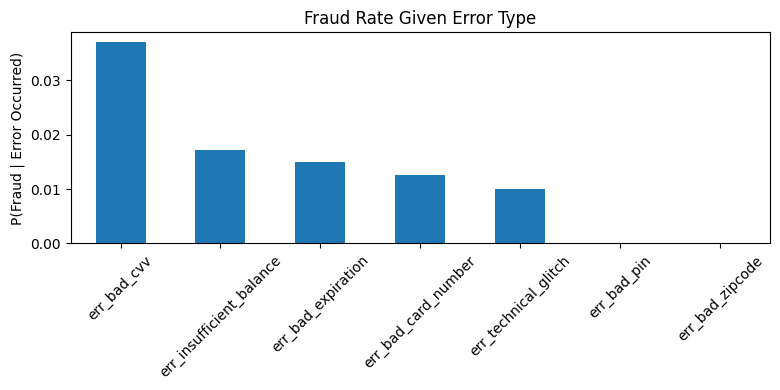

In [52]:
fraud_rate_by_error = {}

for col in error_cols:
    fraud_rate_by_error[col] = df2[df2[col] == 1]["fraud"].mean()

fraud_rate_by_error = pd.Series(fraud_rate_by_error).sort_values(ascending=False)

print(fraud_rate_by_error)

fraud_rate_by_error.plot(kind="bar", figsize=(8,4))
plt.ylabel("P(Fraud | Error Occurred)")
plt.title("Fraud Rate Given Error Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
df.drop(columns=["err_bad_pin","err_bad_zipcode"], inplace=True)

-> cvv error가 핵심

# acct
- acct_open_year
- acct_open_month

In [53]:
df2 = df.copy()

# 거래 기준 총 개월 수
tx_total_month = df2["tx_year"] * 12 + df2["tx_month"]
open_total_month = df2["acct_open_year"] * 12 + df2["acct_open_month"]

df2["account_age_months"] = tx_total_month - open_total_month

# 음수 처리 (데이터 오류 방지)
df2.loc[df2["account_age_months"] < 0, "account_age_months"] = 0

df2 = df2.dropna(subset=["account_age_months", "fraud"])


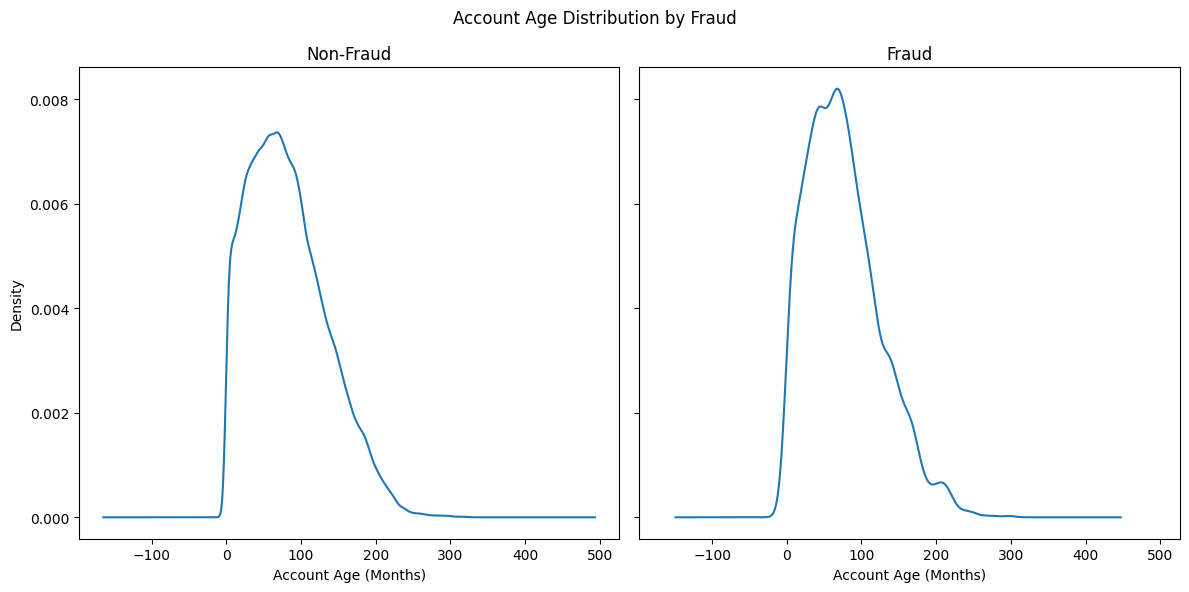

In [54]:
df_nf = df2[df2["fraud"] == 0]
df_f  = df2[df2["fraud"] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["account_age_months"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Account Age (Months)")
ax1.set_ylabel("Density")

df_f["account_age_months"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("Account Age (Months)")

plt.suptitle("Account Age Distribution by Fraud")
plt.tight_layout()
plt.show()


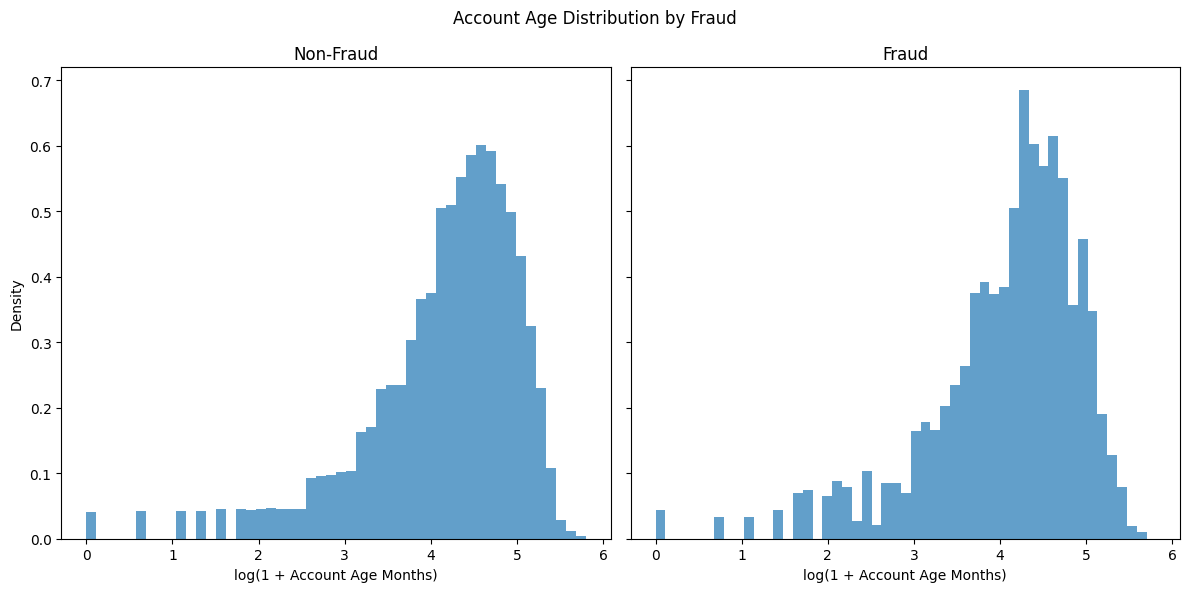

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.hist(np.log1p(df_nf["account_age_months"]),
         bins=50, density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("log(1 + Account Age Months)")
ax1.set_ylabel("Density")

ax2.hist(np.log1p(df_f["account_age_months"]),
         bins=50, density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("log(1 + Account Age Months)")

plt.suptitle("Account Age Distribution by Fraud")
plt.tight_layout()
plt.show()


/tmp/ipykernel_3449023/2884826611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df2.groupby(bins)["fraud"].mean()


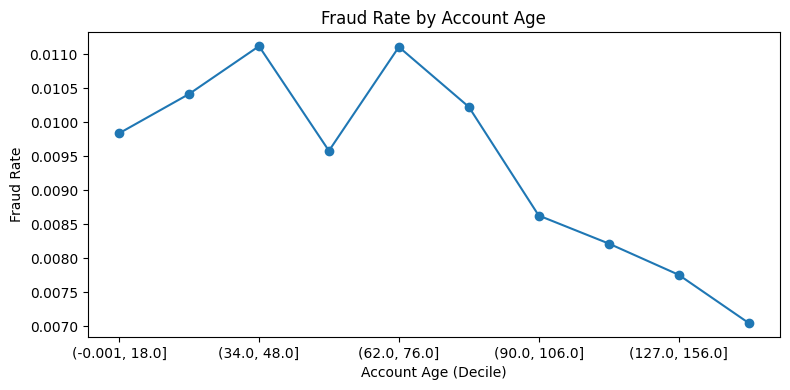

In [56]:
bins = pd.qcut(df2["account_age_months"], 10, duplicates="drop")
fraud_rate = df2.groupby(bins)["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.xlabel("Account Age (Decile)")
plt.title("Fraud Rate by Account Age")
plt.tight_layout()
plt.show()


In [145]:
evaluate_numeric_feature(df2, "acct_open_month")

KS_p          0.000416
MW_p          0.001001
Cohen_d      -0.036658
Odds_Ratio    0.989216
Logit_p       0.000893
PR_AUC        0.009192
dtype: float64

# expiers
- expiers_year
- expiers_month
- months_to_expire

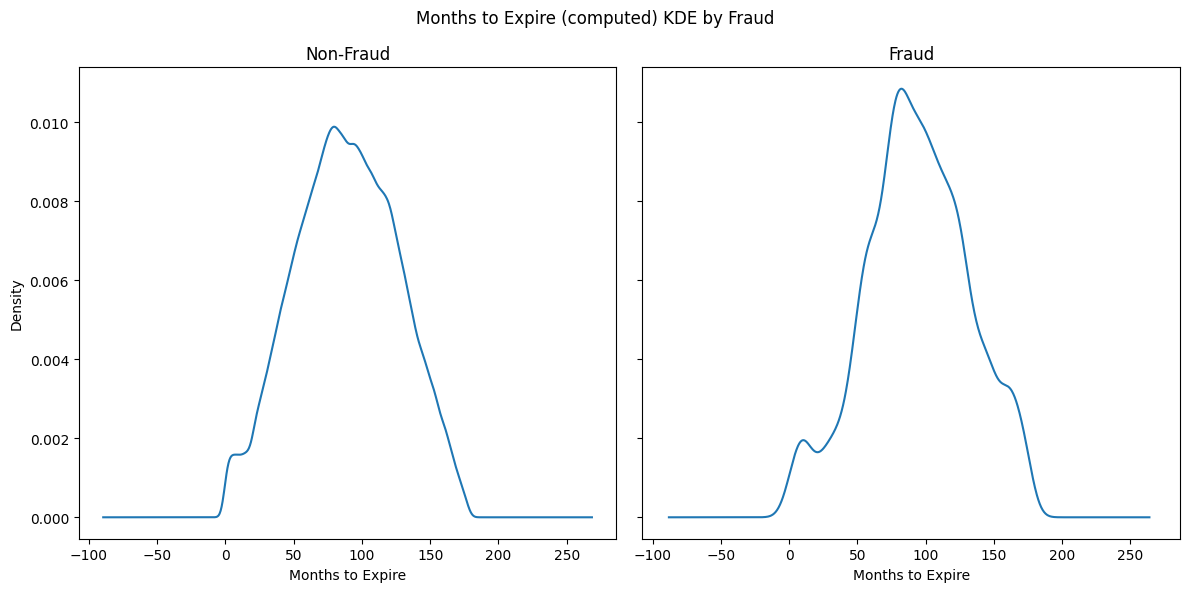

In [59]:
df2 = df.copy()

tx_total_month = df2["tx_year"] * 12 + df2["tx_month"]
expire_total_month = df2["expires_year"] * 12 + df2["expires_month"]
df2["months_to_expire_calc"] = expire_total_month - tx_total_month

df2 = df2.dropna(subset=["months_to_expire_calc", "fraud"])

df_nf = df2[df2["fraud"] == 0]
df_f  = df2[df2["fraud"] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["months_to_expire_calc"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Months to Expire")

df_f["months_to_expire_calc"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("Months to Expire")

plt.suptitle("Months to Expire (computed) KDE by Fraud")
plt.tight_layout()
plt.show()


In [109]:
evaluate_numeric_feature(df2, "months_to_expire_calc")

KS_p          1.099974e-39
MW_p          3.036062e-35
Cohen_d       1.408862e-01
Odds_Ratio    1.003777e+00
Logit_p       2.910298e-37
PR_AUC        1.138067e-02
dtype: float64

# Time
- tx_year
- tx_month
- tx_day
- tx_hour

### Hour

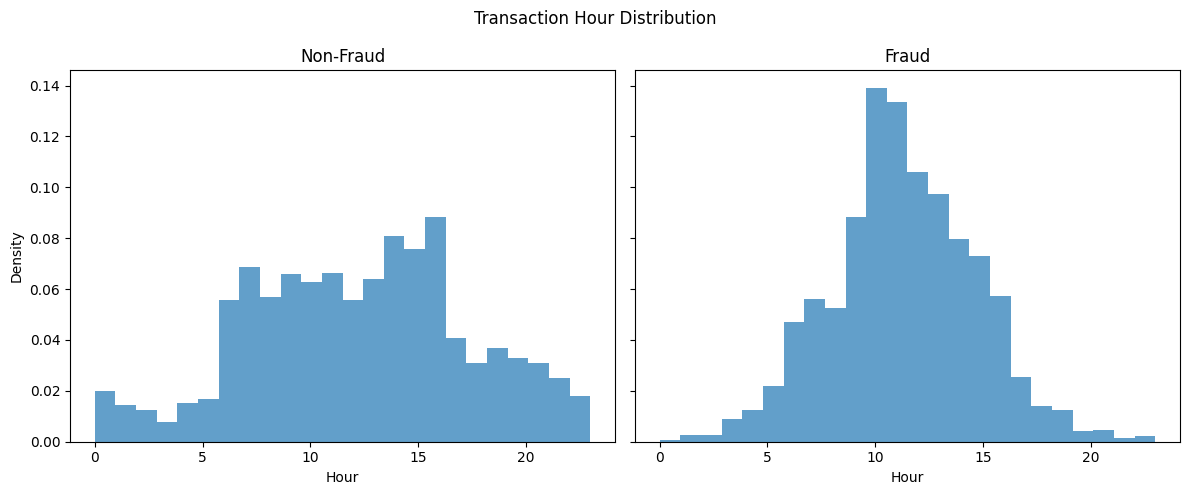

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.hist(df_nf["tx_hour"], bins=24, density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Density")

ax2.hist(df_f["tx_hour"], bins=24, density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("Hour")

plt.suptitle("Transaction Hour Distribution")
plt.tight_layout()
plt.show()

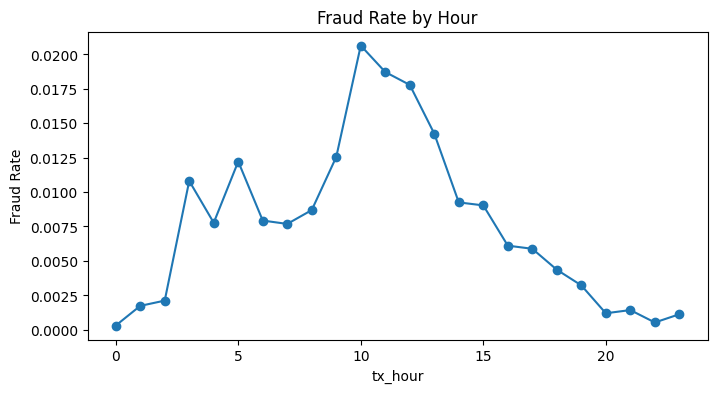

In [61]:
fraud_rate_hour = df.groupby("tx_hour")["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate_hour.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Hour")
plt.show()

### day

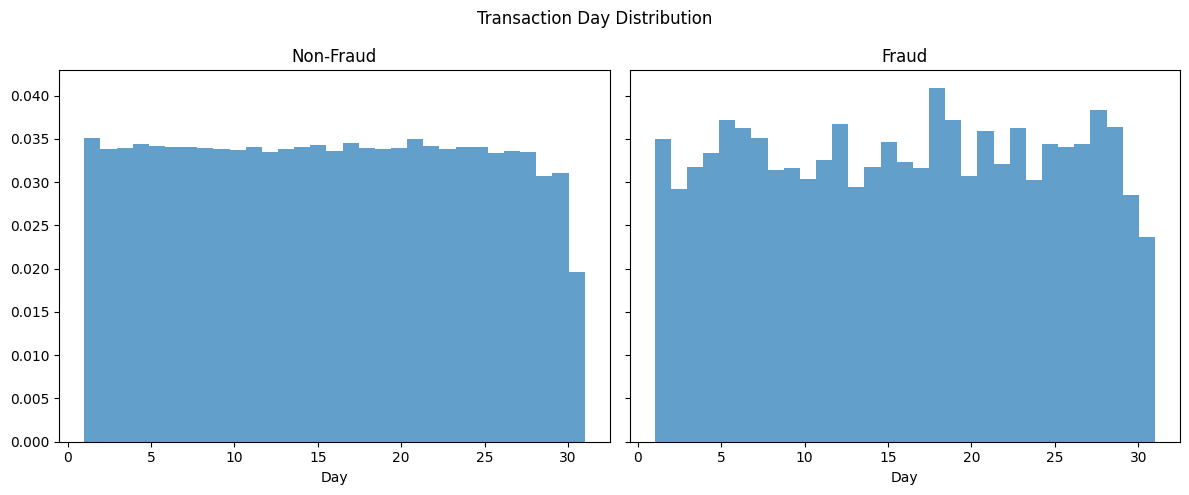

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.hist(df_nf["tx_day"], bins=31, density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Day")

ax2.hist(df_f["tx_day"], bins=31, density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("Day")

plt.suptitle("Transaction Day Distribution")
plt.tight_layout()
plt.show()

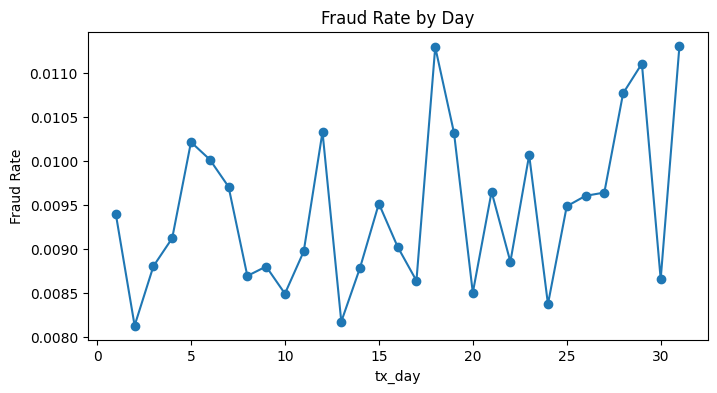

In [63]:
fraud_rate_day = df.groupby("tx_day")["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate_day.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Day")
plt.show()


### month

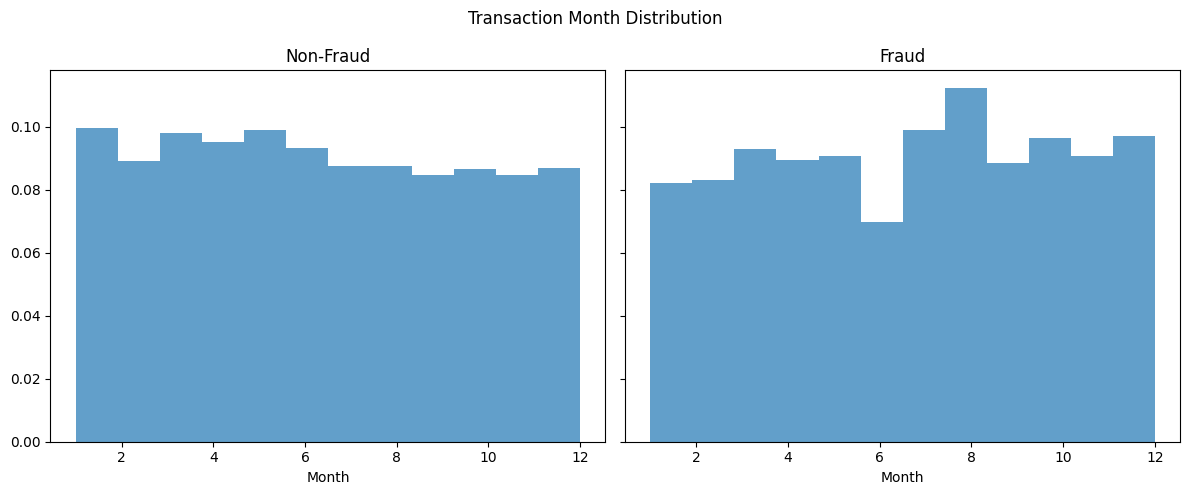

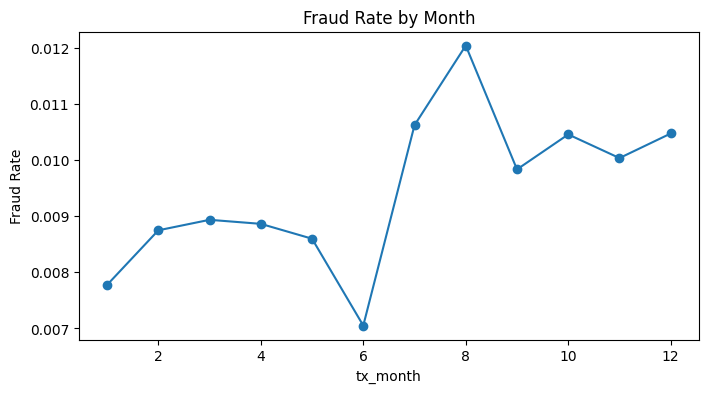

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.hist(df_nf["tx_month"], bins=12, density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Month")

ax2.hist(df_f["tx_month"], bins=12, density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("Month")

plt.suptitle("Transaction Month Distribution")
plt.tight_layout()
plt.show()

fraud_rate_month = df.groupby("tx_month")["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate_month.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Month")
plt.show()


### year

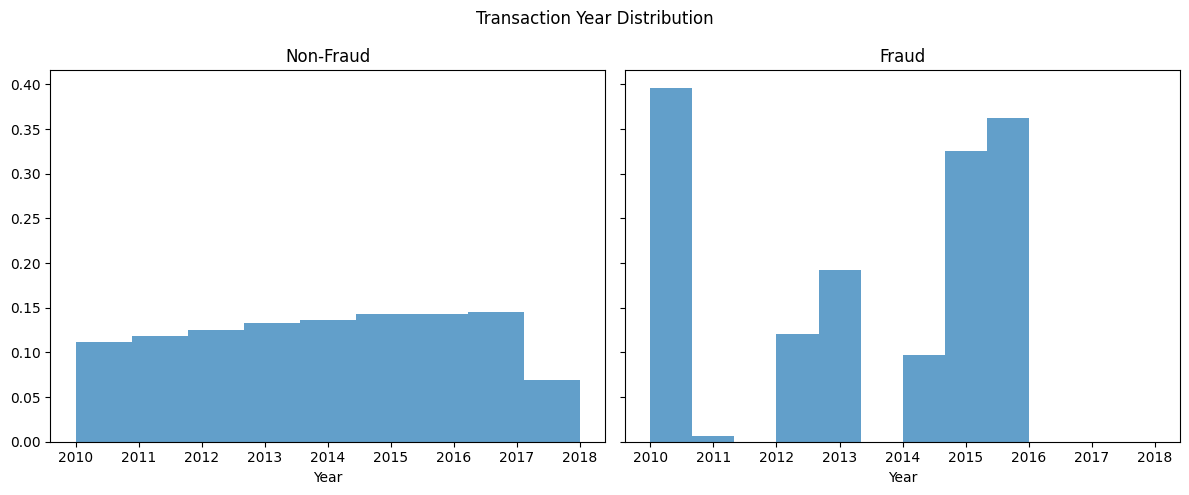

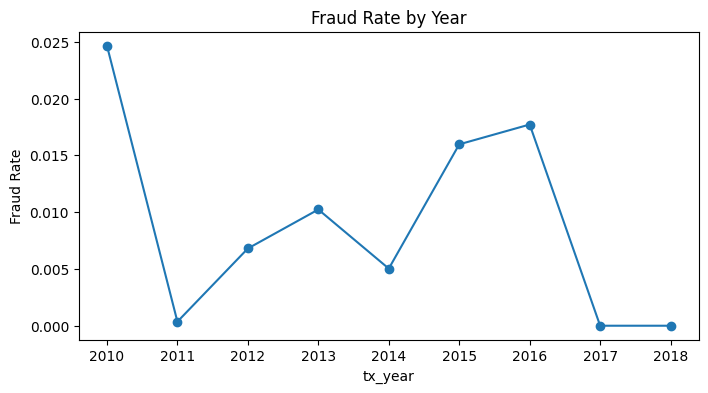

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.hist(df_nf["tx_year"], bins=len(df["tx_year"].unique()), density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Year")

ax2.hist(df_f["tx_year"], bins=len(df["tx_year"].unique()), density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("Year")

plt.suptitle("Transaction Year Distribution")
plt.tight_layout()
plt.show()

fraud_rate_year = df.groupby("tx_year")["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate_year.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Year")
plt.show()


In [137]:
evaluate_numeric_feature(df, "tx_month")

KS_p          1.548762e-26
MW_p          5.645017e-17
Cohen_d       9.233662e-02
Odds_Ratio    1.027099e+00
Logit_p       6.183829e-17
PR_AUC        1.008148e-02
dtype: float64

In [138]:
evaluate_numeric_feature(df, "tx_day")

KS_p          0.010661
MW_p          0.006689
Cohen_d       0.030025
Odds_Ratio    1.003420
Logit_p       0.006505
PR_AUC        0.009721
dtype: float64

In [139]:
evaluate_numeric_feature(df, "tx_hour")

KS_p          1.407960e-230
MW_p           5.362202e-90
Cohen_d       -1.896695e-01
Odds_Ratio     9.651146e-01
Logit_p        5.196214e-66
PR_AUC         7.773111e-03
dtype: float64

# is_weekend

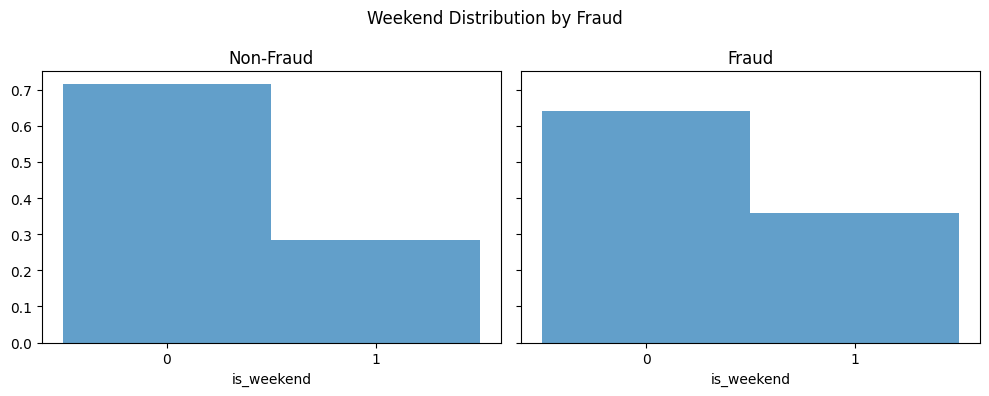

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax1.hist(df_nf["is_weekend"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax1.set_xticks([0, 1])
ax1.set_title("Non-Fraud")
ax1.set_xlabel("is_weekend")

ax2.hist(df_f["is_weekend"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax2.set_xticks([0, 1])
ax2.set_title("Fraud")
ax2.set_xlabel("is_weekend")

plt.suptitle("Weekend Distribution by Fraud")
plt.tight_layout()
plt.show()

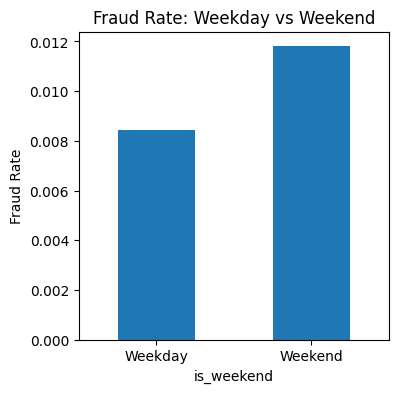

is_weekend
0    0.008440
1    0.011806
Name: fraud, dtype: float64


In [67]:
fraud_rate_weekend = df.groupby("is_weekend")["fraud"].mean()

plt.figure(figsize=(4,4))
fraud_rate_weekend.plot(kind="bar")
plt.ylabel("Fraud Rate")
plt.xticks([0,1], ["Weekday", "Weekend"], rotation=0)
plt.title("Fraud Rate: Weekday vs Weekend")
plt.show()

print(fraud_rate_weekend)


In [110]:
evaluate_numeric_feature(df, "is_weekend")

KS_p          2.696621e-39
MW_p          1.518161e-49
Cohen_d       1.632826e-01
Odds_Ratio    1.403601e+00
Logit_p       4.211534e-49
PR_AUC        1.026338e-02
dtype: float64

# Paid
- is_credit
- is_prepaid

### credit

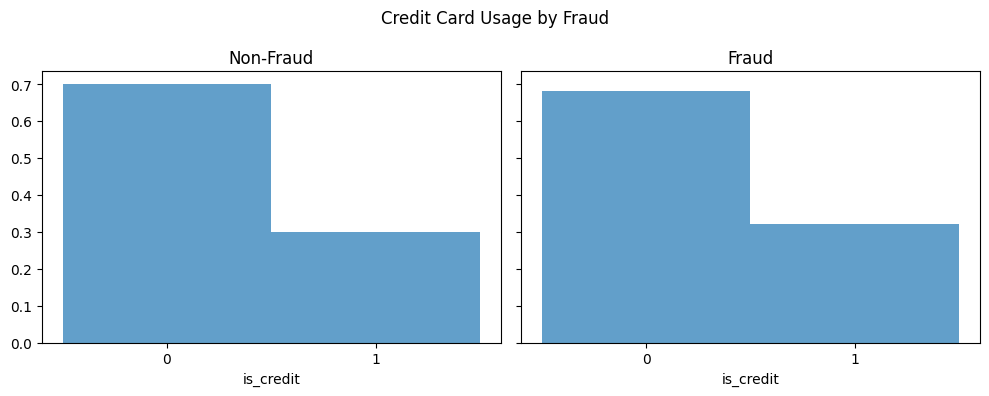

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax1.hist(df_nf["is_credit"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax1.set_xticks([0, 1])
ax1.set_title("Non-Fraud")
ax1.set_xlabel("is_credit")

ax2.hist(df_f["is_credit"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax2.set_xticks([0, 1])
ax2.set_title("Fraud")
ax2.set_xlabel("is_credit")

plt.suptitle("Credit Card Usage by Fraud")
plt.tight_layout()
plt.show()


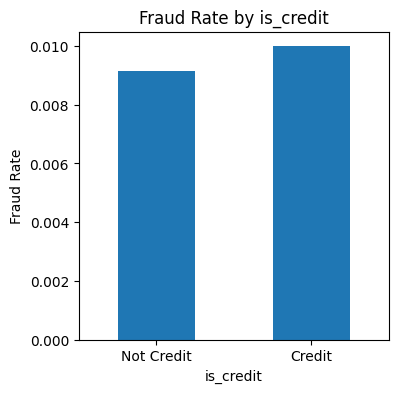

is_credit
0    0.009145
1    0.009995
Name: fraud, dtype: float64


In [69]:
fraud_rate_credit = df.groupby("is_credit")["fraud"].mean()

plt.figure(figsize=(4,4))
fraud_rate_credit.plot(kind="bar")
plt.xticks([0,1], ["Not Credit", "Credit"], rotation=0)
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by is_credit")
plt.show()

print(fraud_rate_credit)

In [111]:
evaluate_numeric_feature(df, "is_credit")

KS_p          0.004648
MW_p          0.000149
Cohen_d       0.041849
Odds_Ratio    1.093860
Logit_p       0.000150
PR_AUC        0.009591
dtype: float64

### is_prepaid

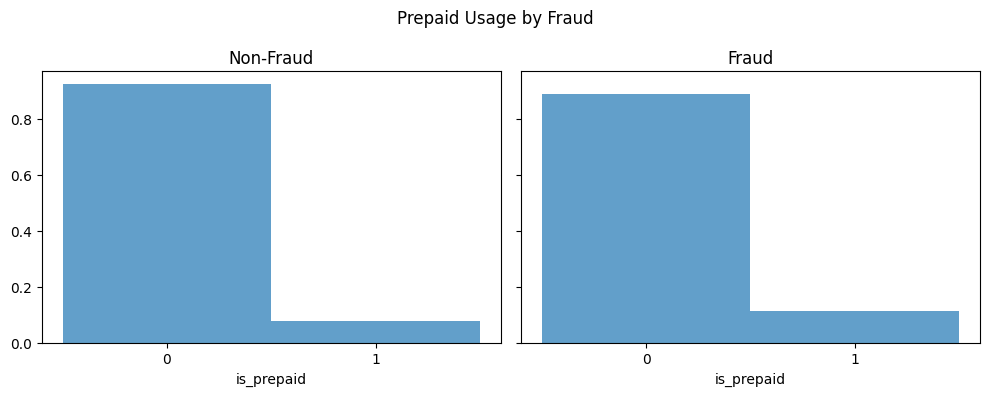

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax1.hist(df_nf["is_prepaid"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax1.set_xticks([0, 1])
ax1.set_title("Non-Fraud")
ax1.set_xlabel("is_prepaid")

ax2.hist(df_f["is_prepaid"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax2.set_xticks([0, 1])
ax2.set_title("Fraud")
ax2.set_xlabel("is_prepaid")

plt.suptitle("Prepaid Usage by Fraud")
plt.tight_layout()
plt.show()


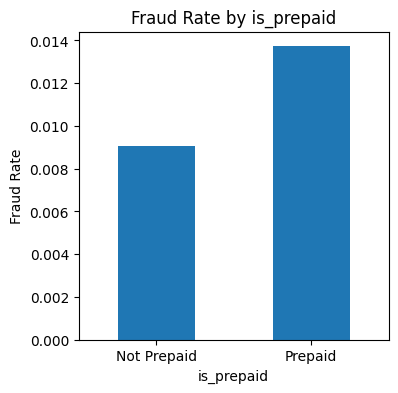

is_prepaid
0    0.009041
1    0.013730
Name: fraud, dtype: float64


In [71]:
fraud_rate_prepaid = df.groupby("is_prepaid")["fraud"].mean()

plt.figure(figsize=(4,4))
fraud_rate_prepaid.plot(kind="bar")
plt.xticks([0,1], ["Not Prepaid", "Prepaid"], rotation=0)
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by is_prepaid")
plt.show()

print(fraud_rate_prepaid)

In [112]:
evaluate_numeric_feature(df, "is_prepaid")

KS_p          1.650199e-09
MW_p          6.217879e-34
Cohen_d       1.339899e-01
Odds_Ratio    1.525776e+00
Logit_p       1.834820e-33
PR_AUC        9.885896e-03
dtype: float64

# Male

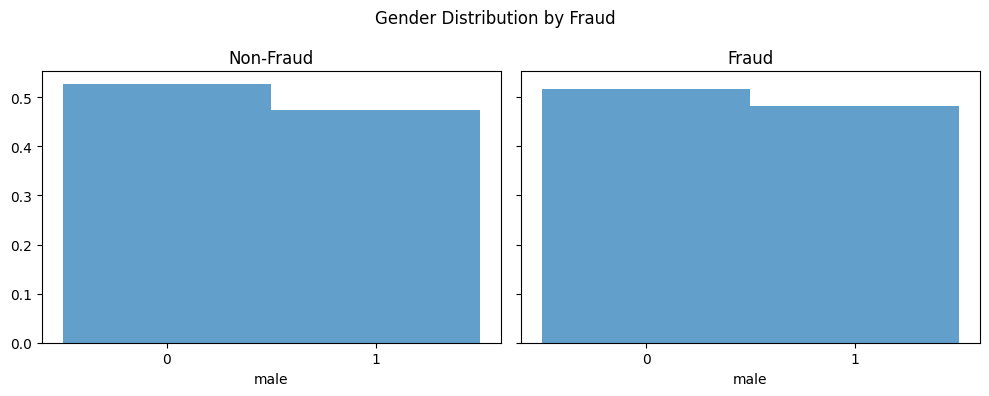

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax1.hist(df_nf["male"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax1.set_xticks([0, 1])
ax1.set_title("Non-Fraud")
ax1.set_xlabel("male")

ax2.hist(df_f["male"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax2.set_xticks([0, 1])
ax2.set_title("Fraud")
ax2.set_xlabel("male")

plt.suptitle("Gender Distribution by Fraud")
plt.tight_layout()
plt.show()


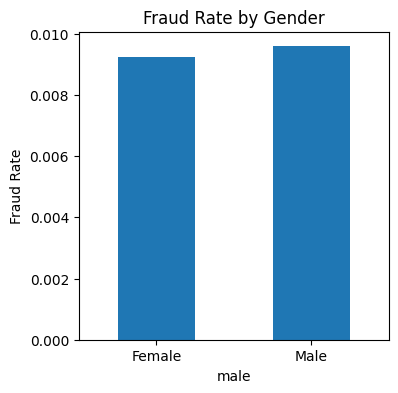

male
0    0.009233
1    0.009588
Name: fraud, dtype: float64


In [73]:
fraud_rate_gender = df.groupby("male")["fraud"].mean()

plt.figure(figsize=(4,4))
fraud_rate_gender.plot(kind="bar")
plt.xticks([0,1], ["Female", "Male"], rotation=0)
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Gender")
plt.show()

print(fraud_rate_gender)


In [113]:
evaluate_numeric_feature(df, "male")

KS_p          0.446440
MW_p          0.084726
Cohen_d       0.019020
Odds_Ratio    1.038794
Logit_p       0.084744
PR_AUC        0.009491
dtype: float64

# MCCG
- mccg_Food_Daily
- mccg_Transport_Travel 
- mccg_Digital_Online
- mccg_Financial 
- mccg_Retail  
- mccg_Medical
- mccg_Entertainment
- mccg_Automotive_Home
- mccg_Utilities_Government
- mccg_Professional_Services  
- mccg_Industrial_/_Manufacturing

In [ ]:
mccg_cols = [
    "mccg_Food_Daily",
    "mccg_Transport_Travel",
    "mccg_Digital_Online",
    "mccg_Financial",
    "mccg_Retail",
    "mccg_Medical",
    "mccg_Entertainment",
    "mccg_Automotive_Home",
    "mccg_Utilities_Government",
    "mccg_Professional_Services",
    "mccg_Industrial_/_Manufacturing",
]

fraud_rate_by_mccg = {}

for col in mccg_cols:
    fraud_rate_by_mccg[col] = df[df[col] == 1]["fraud"].mean()

fraud_rate_by_mccg = (
    pd.Series(fraud_rate_by_mccg)
    .sort_values(ascending=False)
)

print(fraud_rate_by_mccg)

mccg_Industrial_/_Manufacturing    1.000000
mccg_Retail                        0.093548
mccg_Financial                     0.046917
mccg_Food_Daily                    0.044477
mccg_Automotive_Home               0.017624
mccg_Entertainment                 0.013109
mccg_Digital_Online                0.006192
mccg_Transport_Travel              0.001533
mccg_Utilities_Government          0.000966
mccg_Professional_Services         0.000000
mccg_Medical                            NaN
dtype: float64


In [75]:
fraud_rate_by_mccg = {}

for col in mccg_cols:
    fraud_rate_by_mccg[col] = df[df[col] == 1]["fraud"].mean()

fraud_rate_by_mccg = (
    pd.Series(fraud_rate_by_mccg)
    .sort_values(ascending=False)
)

print(fraud_rate_by_mccg)


mccg_Industrial_/_Manufacturing    1.000000
mccg_Retail                        0.093548
mccg_Financial                     0.046917
mccg_Food_Daily                    0.044477
mccg_Automotive_Home               0.017624
mccg_Entertainment                 0.013109
mccg_Digital_Online                0.006192
mccg_Transport_Travel              0.001533
mccg_Utilities_Government          0.000966
mccg_Professional_Services         0.000000
mccg_Medical                            NaN
dtype: float64


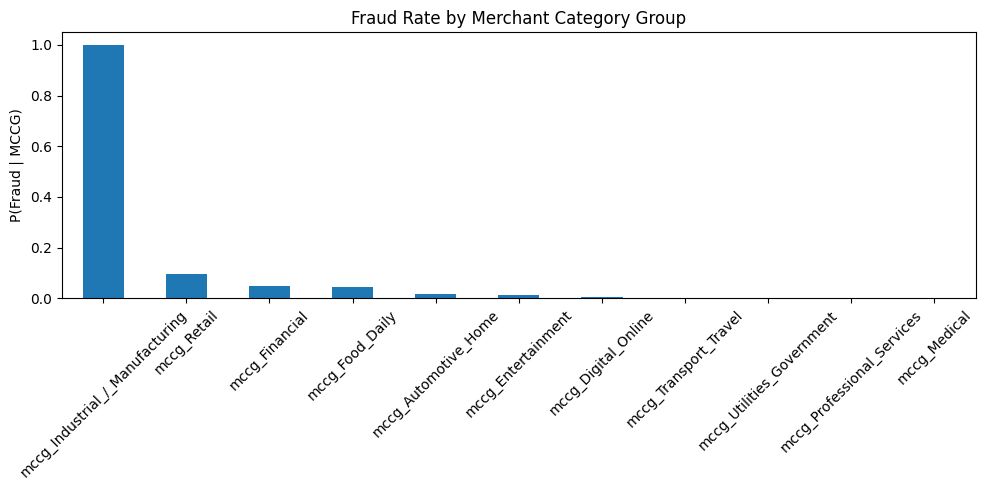

In [76]:
fraud_rate_by_mccg.plot(kind="bar", figsize=(10,5))
plt.ylabel("P(Fraud | MCCG)")
plt.title("Fraud Rate by Merchant Category Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


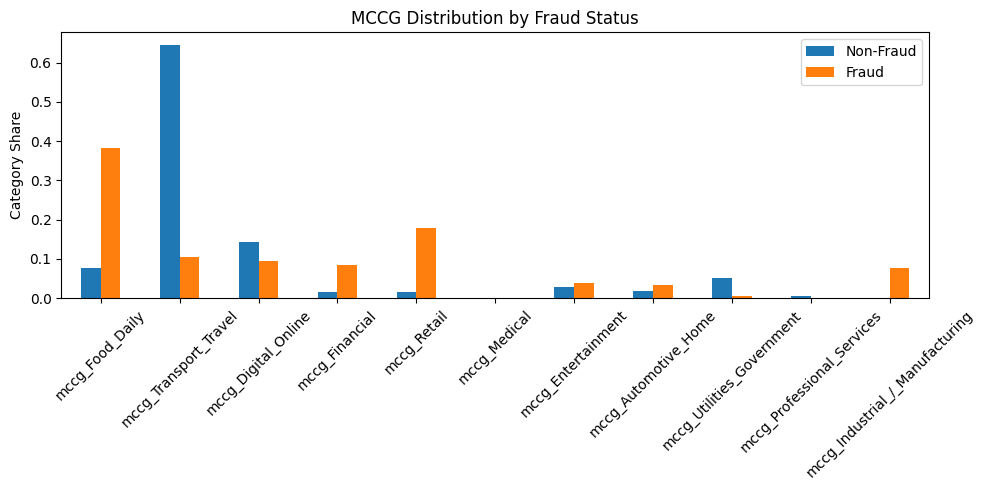

In [77]:
nf_rate = df[df["fraud"]==0][mccg_cols].mean()
f_rate  = df[df["fraud"]==1][mccg_cols].mean()

compare = pd.DataFrame({
    "Non-Fraud": nf_rate,
    "Fraud": f_rate
})

compare.plot(kind="bar", figsize=(10,5))
plt.ylabel("Category Share")
plt.title("MCCG Distribution by Fraud Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [124]:
mccg_cols

['mccg_Food_Daily',
 'mccg_Transport_Travel',
 'mccg_Digital_Online',
 'mccg_Financial',
 'mccg_Retail',
 'mccg_Medical',
 'mccg_Entertainment',
 'mccg_Automotive_Home',
 'mccg_Utilities_Government',
 'mccg_Professional_Services',
 'mccg_Industrial_/_Manufacturing']

In [133]:

def evaluate_numeric_feature_safe(df, feature):
    s = df[feature]
    y = df["fraud"]

    m = s.notna() & y.notna()
    s = s[m]
    y = y[m]

    x_nf = s[y == 0]
    x_f  = s[y == 1]

    ks_stat, ks_p = ks_2samp(x_nf, x_f)
    mw_stat, mw_p = mannwhitneyu(x_nf, x_f, alternative="two-sided")

    def cohens_d(x, z):
        nx, nz = len(x), len(z)
        pooled_std = np.sqrt(((nx-1)*x.std()**2 + (nz-1)*z.std()**2) / (nx+nz-2))
        return (x.mean() - z.mean()) / pooled_std

    d = cohens_d(x_f, x_nf)

    pr_auc = average_precision_score(y, s)

    # logit (실패하면 NaN 처리)
    odds_ratio = np.nan
    logit_p = np.nan
    try:
        X = sm.add_constant(s.to_frame())
        model = sm.Logit(y, X).fit(disp=0)
        odds_ratio = float(np.exp(model.params[feature]))
        logit_p = float(model.pvalues[feature])
    except Exception:
        pass

    return pd.Series({
        "KS_p": ks_p,
        "MW_p": mw_p,
        "Cohen_d": d,
        "Odds_Ratio": odds_ratio,
        "Logit_p": logit_p,
        "PR_AUC": pr_auc,
        "n": len(s),
        "pos_rate": float(y.mean())
    })


In [134]:
results = {}

for col in mccg_cols:
    print(f"Evaluating: {col}")
    results[col] = evaluate_numeric_feature_safe(df, col)

mccg_results = pd.DataFrame(results).T
mccg_results = mccg_results.sort_values("PR_AUC", ascending=False)

mccg_results


Evaluating: mccg_Food_Daily
Evaluating: mccg_Transport_Travel
Evaluating: mccg_Digital_Online
Evaluating: mccg_Financial
Evaluating: mccg_Retail
Evaluating: mccg_Medical


/tmp/ipykernel_3449023/3739477011.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return (x.mean() - z.mean()) / pooled_std


Evaluating: mccg_Entertainment
Evaluating: mccg_Automotive_Home
Evaluating: mccg_Utilities_Government
Evaluating: mccg_Professional_Services


/home/nakyung/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluating: mccg_Industrial_/_Manufacturing


/home/nakyung/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,KS_p,MW_p,Cohen_d,Odds_Ratio,Logit_p,PR_AUC,n,pos_rate
mccg_Industrial_/_Manufacturing,8.384151e-44,0.000000e+00,2.997670,2.982054e+11,9.895116e-01,0.086566,882143.0,0.009401
mccg_Retail,3.584919e-187,0.000000e+00,1.226630,1.300732e+01,0.000000e+00,0.024347,882143.0,0.009401
mccg_Food_Daily,0.000000e+00,0.000000e+00,1.123800,7.324705e+00,0.000000e+00,0.022822,882143.0,0.009401
mccg_Financial,1.465782e-34,0.000000e+00,0.532934,5.579184e+00,0.000000e+00,0.012613,882143.0,0.009401
mccg_Automotive_Home,3.102351e-02,2.249527e-27,0.119595,1.921559e+00,1.754673e-26,0.009679,882143.0,0.009401
mccg_Entertainment,2.596274e-01,9.523676e-10,0.067493,1.415841e+00,1.153209e-09,0.009545,882143.0,0.009401
mccg_Medical,1.000000e+00,1.000000e+00,NaN,NaN,NaN,0.009401,882143.0,0.009401
mccg_Professional_Services,9.972750e-01,1.514614e-09,-0.066672,4.146520e-06,8.787914e-01,0.009401,882143.0,0.009401
mccg_Utilities_Government,2.284057e-15,6.310839e-80,-0.208911,9.715482e-02,1.891526e-52,0.009357,882143.0,0.009401
mccg_Digital_Online,1.021524e-17,3.331202e-37,-0.140627,6.209273e-01,1.514169e-36,0.009099,882143.0,0.009401


# card type
- cb_Visa 
- cb_Mastercard
- cb_Amex
- cb_Discover  

In [78]:
card_cols = [
    "cb_Visa",
    "cb_Mastercard",
    "cb_Amex",
    "cb_Discover",
]

fraud_rate_by_card = {}

for col in card_cols:
    fraud_rate_by_card[col] = df[df[col] == 1]["fraud"].mean()

fraud_rate_by_card = (
    pd.Series(fraud_rate_by_card)
    .sort_values(ascending=False)
)

print(fraud_rate_by_card)


cb_Discover      0.014427
cb_Amex          0.009772
cb_Mastercard    0.009367
cb_Visa          0.009060
dtype: float64


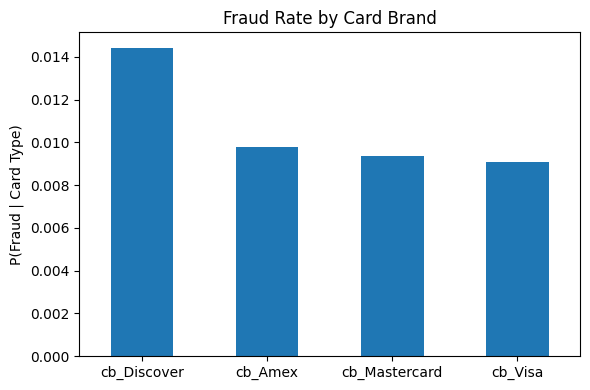

In [80]:
fraud_rate_by_card.plot(kind="bar", figsize=(6,4))
plt.ylabel("P(Fraud | Card Type)")
plt.title("Fraud Rate by Card Brand")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

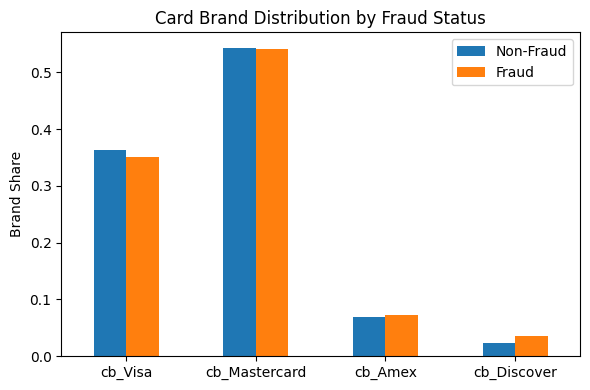

In [81]:
nf_rate = df[df["fraud"]==0][card_cols].mean()
f_rate  = df[df["fraud"]==1][card_cols].mean()

compare = pd.DataFrame({
    "Non-Fraud": nf_rate,
    "Fraud": f_rate
})

compare.plot(kind="bar", figsize=(6,4))
plt.ylabel("Brand Share")
plt.title("Card Brand Distribution by Fraud Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [136]:
results = {}

for col in card_cols:
    print(f"Evaluating: {col}")
    results[col] = evaluate_numeric_feature_safe(df, col)

mccg_results = pd.DataFrame(results).T
mccg_results = mccg_results.sort_values("PR_AUC", ascending=False)

mccg_results

Evaluating: cb_Visa
Evaluating: cb_Mastercard
Evaluating: cb_Amex
Evaluating: cb_Discover


,KS_p,MW_p,Cohen_d,Odds_Ratio,Logit_p,PR_AUC,n,pos_rate
cb_Discover,0.154155,5.365933e-14,0.083001,1.562429,8.594630e-14,0.009579,882143.0,0.009401
cb_Amex,1.000000,3.223179e-01,0.010919,1.042987,3.223530e-01,0.009428,882143.0,0.009401
cb_Mastercard,1.000000,7.220421e-01,-0.003925,0.992154,7.220426e-01,0.009383,882143.0,0.009401
cb_Visa,0.108544,1.223443e-02,-0.027641,0.943722,1.224619e-02,0.009282,882143.0,0.009401
